
Graph Theory Analysis for SCIFES Data 
============================================


### Group Names and Descriptions
<table style="width:50%; border:1px solid black; border-collapse:collapse; align=left">
  <tr>
    <th style="text-align:left; border:1px solid black; padding:4px;">Group Name</th>
    <th style="text-align:left; border:1px solid black; padding:4px;">Description</th>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">cFES-pre</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling with FES, pre-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">cFES-post</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling with FES, post-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">c-pre</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling only (no FES), pre-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">c-post</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling only (no FES), post-intervention</td>
  </tr>
</table> 

####  1. Load important libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets
from nilearn import plotting 

# Using the NiftiLabelsMasker
# from nilearn.input_data import NiftiLabelsMasker
from nilearn.maskers import NiftiLabelsMasker


# /Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: 
#         FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. 
#             Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. 
#             Please import from 'nilearn.maskers' instead.
            
from nilearn.connectome import ConnectivityMeasure #communitymeasures
from brainconn import degree, centrality, clustering, core, distance, modularity, utils

from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats
from statsmodels.robust.scale import huber

import scipy.io
import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

 
from scipy.stats import rankdata
from joblib import Parallel, delayed
from tqdm import tqdm

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


####  2. Setup atlas, labels and review brain colormaps

Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


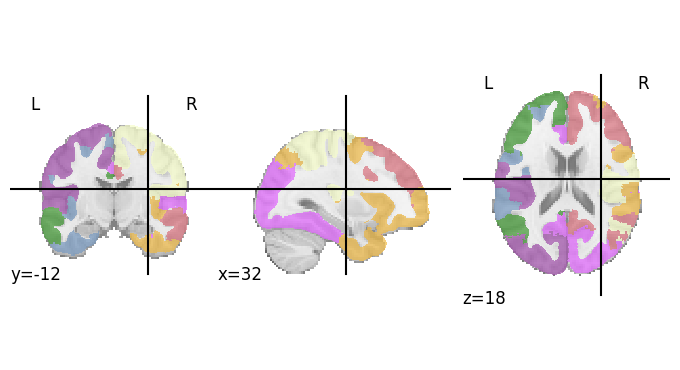

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

####  3. setup group labels for load funtional data 

In [3]:
#%% Load the functional datasets (pre mid post FES, NFES) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data'

# analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY


# if analysis == "ALL":
#     group = ['pre_fes', 'pre_nfes', 'mid_fes', 'mid_nfes', 'post_fes', 'post_nfes']; 
#     group_label = ['Pre FES', 'Pre Non-FES', 'Post NFES']
# #     group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']

# elif analysis == "Group":
#     group = ['fes', 'nfes']; group_label = ['FES', 'Non-FES']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


#### 4. Load fMRI data runs for each group, extract timeseries (ts) and save a copy.

In [4]:
group_label = ['cFES-pre', 'cFES-post', 'c-pre', 'c-post']

#### 5. Load community labels  from matlab

In [311]:
#%% Consensus community label assigment
n_set = 4
# 200xn

## Lee etal Method
S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S1_comm_label.mat', squeeze_me=True)['N_all_g1']; #PreFES 
S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S2_comm_label.mat', squeeze_me=True)['N_all_g2']; #PreSham 
S_g3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S3_comm_label.mat', squeeze_me=True)['N_all_g3']; #PostFES
S_g4 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S4_comm_label.mat', squeeze_me=True)['N_all_g4']; #PostSham

communities = [S_g1, S_g2, S_g3, S_g4]

S1_cFES_pre = S_g1
S2_c_pre = S_g2
S3_cFES_post = S_g3
S4_c_post = S_g4

In [319]:
# len(S2_c_pre)
# np.shape(S2_c_pre)
# np.shape(S4_c_post)
# type(S4_c_post)

(200, 10)

#### 6. Compute recruitment, Integration, module allegiance values 

In [6]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings
# group_label = ['Pre FES', 'Post FES', 'Pre NFES']
# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) 

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()
# 1=pre_fes; 2=pre_nfes; 3=post_fes

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc): 
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc


#### 7. Previous permutation test

In [7]:
# # PreFES vs PostFES
# # rec int coeff.
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_cFES_pre.npy', recruitment[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_cFES_pre.npy', integration[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_c_pre.npy', recruitment[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_c_pre.npy', integration[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_cFES_post.npy', recruitment[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_cFES_post.npy', integration[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_c_post.npy', recruitment[3])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_c_post.npy', integration[3])

# # alg
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_cFES_pre.npy', allegiance[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_c_pre.npy', allegiance[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_cFES_post.npy', allegiance[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_c_post.npy', allegiance[3])
# # corr mxt
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_cFES_pre.npy', corr_g1_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_c_pre.npy', corr_g2_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_cFES_post.npy', corr_g5_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_c_post.npy', corr_g6_mean)


# print(f'File saved!')

In [8]:
# Load the data from the .npy files
os.chdir('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/')
cFES_pre_rec = np.load('recruitment_cFES_pre.npy')
cFES_pre_int = np.load('integration_cFES_pre.npy')

c_pre_rec = np.load('recruitment_c_pre.npy')
c_pre_int = np.load('integration_c_pre.npy')

cFES_post_rec = np.load('recruitment_cFES_post.npy')
cFES_post_int = np.load('integration_cFES_post.npy')

c_post_rec = np.load('recruitment_c_post.npy')
c_post_int = np.load('integration_c_post.npy')

alg_cFES_pre = np.load('allegiance_cFES_pre.npy')
alg_c_pre = np.load('allegiance_c_pre.npy')

alg_cFES_post = np.load('allegiance_cFES_post.npy')
alg_c_post = np.load('allegiance_c_post.npy')

# corr_prefes, corr_presham, corr_postfes, corr_postsham
corr_cFES_pre = np.load('corr_cFES_pre.npy')
corr_c_pre = np.load('corr_c_pre.npy')

corr_cFES_post = np.load('corr_cFES_post.npy')
corr_c_post = np.load('corr_c_post.npy')

print(alg_cFES_pre.shape)
# cFES_pre', 'cFES_post', 'c_pre', 'c_post'

(200, 200)


In [143]:
import numpy as np

def extract_SMN_slices(x_rec, z_rec, x_in, z_in, idx1=(14, 30), idx2=(115, 134)):
    """
    Extracts and concatenates specific slices from input arrays to isolate the SMN region.
    
    Parameters:
    - x_rec, z_rec: Recruitment arrays (pre, post)
    - x_in, z_in: Integration arrays (pre, post)
    - idx1, idx2: Tuples indicating the start and end slice indices (default SMN: 14–30 and 115–134)

    Returns:
    - x_rec_SMN, z_rec_SMN, x_in_SMN, z_in_SMN: Concatenated SMN slices
    """

    def concat_slices(arr, idx1, idx2):
        return np.concatenate((arr[idx1[0]:idx1[1]], arr[idx2[0]:idx2[1]]))

    x_rec_SMN = concat_slices(x_rec, idx1, idx2)
    z_rec_SMN = concat_slices(z_rec, idx1, idx2)
    x_in_SMN  = concat_slices(x_in,  idx1, idx2)
    z_in_SMN  = concat_slices(z_in,  idx1, idx2)

    print(f"SMN shape: {x_rec_SMN.shape}-{z_rec_SMN.shape}-{x_in_SMN.shape}-{z_in_SMN.shape}\n")


    return x_rec_SMN, z_rec_SMN, x_in_SMN, z_in_SMN



def extract_smn_block(alg_a, alg_b, idx1=(14, 30), idx2=(115, 134), verbose=True):
    """
    Extract and stack submatrices from allegiance matrices to form 35x35 SMN matrices.

    Parameters:
    - alg_a, alg_b: Input allegiance matrices (e.g., from pre/post or condition A/B)
    - idx1, idx2: Tuples of (start, end) indices for two brain subregions
    - verbose: Whether to print matrix shapes

    Returns:
    - alg_smn_a, alg_smn_b: Two (35, 35) allegiance submatrices
    """
    i1_start, i1_end = idx1
    i2_start, i2_end = idx2

    def extract_block(matrix):
        s1 = matrix[i1_start:i1_end, i1_start:i1_end]
        s2 = matrix[i1_start:i1_end, i2_start:i2_end]
        s3 = matrix[i2_start:i2_end, i1_start:i1_end]
        s4 = matrix[i2_start:i2_end, i2_start:i2_end]
        top = np.hstack((s1, s2))
        bottom = np.hstack((s3, s4))
        return np.vstack((top, bottom))

    alg_smn_a = extract_block(alg_a)
    alg_smn_b = extract_block(alg_b)

    if verbose:
        print(f"cl/Alg SMN : {alg_smn_a.shape} - {alg_smn_b.shape}")

    return alg_smn_a, alg_smn_b
# alg_smn_a, alg_smn_b = extract_smn_block(alg_cFES_pre, alg_cFES_post)

def extract_smn_block1(matrix_a, matrix_b, row_ranges=((14, 30), (115, 134)), label_a="pre", label_b="post"):
    """
    Extracts and stacks rows from two matrices to isolate SMN regions.

    Parameters:
    - matrix_a, matrix_b: Input matrices to slice (e.g., S1_cFES_pre, S3_cFES_post)
    - row_ranges: Tuple of two (start, end) index pairs indicating rows to extract
    - label_a, label_b: Optional labels to identify the two conditions in printed output

    Returns:
    - smn_a, smn_b: Extracted and stacked SMN matrices
    """
    slice1_a = matrix_a[row_ranges[0][0]:row_ranges[0][1], :]
    slice2_a = matrix_a[row_ranges[1][0]:row_ranges[1][1], :]
    smn_a = np.vstack((slice1_a, slice2_a))
   

    slice1_b = matrix_b[row_ranges[0][0]:row_ranges[0][1], :]
    slice2_b = matrix_b[row_ranges[1][0]:row_ranges[1][1], :]
    smn_b = np.vstack((slice1_b, slice2_b))
    print(f'SMN shape: {smn_a.shape}-{smn_b.shape}')

    return smn_a, smn_b


In [222]:
# Group #1: cFES vs. Sham (for example)
# cFES_pre_rec, cFES_pre_int, c_pre_rec, c_pre_int
# alg_cFES_pre post 
# alg_c_pre post

# x_rec = cFES_pre_rec
# z_rec = cFES_post_rec
# x_in = cFES_pre_int
# z_in = cFES_post_int

# x_rec = cFES_pre_rec
# z_rec = cFES_post_rec
# x_in = cFES_pre_int
# z_in = cFES_post_int

# fes_pre = x_rec_SMN_cfes 
# fes_post = z_rec_SMN_cfes 
# cycling_pre = x_rec_SMN_c 
# cycling_post = z_rec_SMN_c cFES_pre_rec

# cl_pre_SMN_cfes, cl_post_SMN_cfes
# cl_pre_SMN_c, cl_post_SMN_c

# x_alg_SMN_cfes, z_alg_SMN_cfes
# x_alg_SMN_c, z_alg_SMN_c

# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c


cl_pre_SMN_cfes, cl_post_SMN_cfes = extract_smn_block1(S1_cFES_pre, S3_cFES_post)
cl_pre_SMN_c, cl_post_SMN_c = extract_smn_block1(S2_c_pre, S4_c_post)

x_alg_SMN_cfes, z_alg_SMN_cfes = extract_smn_block(alg_cFES_pre, alg_cFES_post)
x_alg_SMN_c, z_alg_SMN_c = extract_smn_block(alg_c_pre, alg_c_post)

x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c = extract_SMN_slices(cFES_pre_rec, cFES_post_rec, c_pre_rec, c_post_rec)
x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c = extract_SMN_slices(cFES_pre_int, cFES_post_int, c_pre_int, c_post_int)

SMN shape: (35, 14)-(35, 14)
SMN shape: (35, 10)-(35, 10)
cl/Alg SMN : (35, 35) - (35, 35)
cl/Alg SMN : (35, 35) - (35, 35)
SMN shape: (35,)-(35,)-(35,)-(35,)

SMN shape: (35,)-(35,)-(35,)-(35,)



In [221]:
def print_stats(name, arr):
    arr = np.nan_to_num(np.array(arr), nan=0.0)  # Replace NaNs with 0
    mean_val = np.mean(arr)
    std_val = np.std(arr)
    print(f"{name:20s} | Mean: {mean_val:.4f} ± {std_val:.4f}")

# Allegiance matrices (2D)
print_stats("pre_alg_SMN_cfes", x_alg_SMN_cfes)
print_stats("post_alg_SMN_cfes", z_alg_SMN_cfes)
print_stats("pre_alg_SMN_c", x_alg_SMN_c)
print_stats("post_alg_SMN_c", z_alg_SMN_c)

# Recruitment vectors (1D)
print_stats("pre_rec_SMN_cfes", x_rec_SMN_cfes)
print_stats("post_rec_SMN_cfes", z_rec_SMN_cfes)
print_stats("pre_rec_SMN_c", x_rec_SMN_c)
print_stats("post_rec_SMN_c", z_rec_SMN_c)

# Integration vectors (1D)
print_stats("pre_int_SMN_cfes", x_int_SMN_cfes)
print_stats("post_int_SMN_cfes", z_int_SMN_cfes)
print_stats("pre_int_SMN_c", x_int_SMN_c)
print_stats("post_int_SMN_c", z_int_SMN_c)


pre_alg_SMN_cfes     | Mean: 0.6703 ± 0.1663
post_alg_SMN_cfes    | Mean: 0.7234 ± 0.1843
pre_alg_SMN_c        | Mean: 0.7840 ± 0.2006
post_alg_SMN_c       | Mean: 0.6668 ± 0.1978
pre_rec_SMN_cfes     | Mean: 0.6900 ± 0.0541
post_rec_SMN_cfes    | Mean: 0.7447 ± 0.0485
pre_rec_SMN_c        | Mean: 0.8071 ± 0.0782
post_rec_SMN_c       | Mean: 0.6864 ± 0.0790
pre_int_SMN_cfes     | Mean: 0.2416 ± 0.0212
post_int_SMN_cfes    | Mean: 0.2776 ± 0.0228
pre_int_SMN_c        | Mean: 0.2926 ± 0.0153
post_int_SMN_c       | Mean: 0.2549 ± 0.0146


In [9]:
# Previous permutation test
# def perm_test_integration(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     diff = np.abs(int_s2 - int_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         int_sp1 = communitymeasures.integration(sp1, static_communities)
#         int_sp2 = communitymeasures.integration(sp2, static_communities)
#         k += diff < np.abs(int_sp2 - int_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# def perm_test_recruitment(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff = np.abs(rec_s2 - rec_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
#         rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
#         k += diff < np.abs(rec_sp2 - rec_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc


# def perm_test_allegiance(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     alg_s1 = communitymeasures.allegiance(s1)
#     alg_s2 = communitymeasures.allegiance(s2)
#     diff = np.abs(alg_s2 - alg_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         alg_sp1 = communitymeasures.allegiance(sp1)
#         alg_sp2 = communitymeasures.allegiance(sp2)
#         k += diff < np.abs(alg_sp2 - alg_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# pvalue = perm_test_allegiance(S_g1, S_g3, nmc=20000)
# print(f'Shape pvalue: {pvalue.shape} {allegiance[0].shape} {allegiance[2].shape}')
 
# Automatic atlas fetching
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]
label = atlas.labels.astype('U') # covert array of bytes to array of strings

color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*17) + (['red']*19)

#### 8.  Permutation-based Friedman Test

In [10]:
# Statistical tests: Allegiance Matrix | Recruitment & Integration Coeffiencent

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import product
 

# # x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN
    
# # Sample data: 7 subjects, pre and post treatment
# # pre = np.array([3.1, 2.7, 4.0, 3.5, 2.9, 3.8, 4.1])
# # post = np.array([3.8, 3.0, 4.5, 4.1, 3.0, 4.2, 4.4])
 
# pre = x_rec_SMN #real data n=35
# post = z_rec_SMN #real data n=35
    
# # Step 1: Compute pre-post difference
# diff = post - pre
# observed_stat = np.mean(diff)
 
# # Step 2: Generate all 2^7 = 128 sign-flip permutations
# sign_flips = np.array(list(product([-1, 1], repeat=len(diff))))
# perm_stats = np.array([np.mean(diff * flip) for flip in sign_flips])
 
# # Step 3: Compute two-sided p-value
# p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
 
# # Step 4: Plot the permutation null distribution
# plt.hist(perm_stats, bins=20, color='lightgray', edgecolor='black')
# plt.axvline(observed_stat, color='red', linestyle='--', label='Observed Mean')
# plt.axvline(-observed_stat, color='red', linestyle='--')
# plt.title("Permutation Test (Mean-Based)")
# plt.xlabel("Permuted Mean Differences")
# plt.ylabel("Frequency")
# plt.legend()
# plt.tight_layout()
# plt.show()
 
# # Step 5: Report results
# print(f"Observed mean difference:   {observed_stat:.4f}")
# print(f"Exact permutation p-value:  {p_value:.4f}")
 
 
 
# # Test using median as test statistics:
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import product
 
# # Sample data: 7 subjects, pre and post treatment
# # pre = np.array([3.1, 2.7, 4.0, 3.5, 2.9, 3.8, 4.1])
# # post = np.array([3.8, 3.0, 4.5, 4.1, 3.0, 4.2, 4.4])

# pre = x_rec_SMN #real data n=35
# post = z_rec_SMN #real data n=35
 
# # Step 1: Compute pre-post difference
# diff = post - pre
# observed_stat = np.median(diff)
 
# # Step 2: Generate all 2^7 = 128 sign-flip permutations
# sign_flips = np.array(list(product([-1, 1], repeat=len(diff))))
# perm_stats = np.array([np.median(diff * flip) for flip in sign_flips])
 
# # Step 3: Compute two-sided p-value
# p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
 
# # Step 4: Plot the permutation null distribution
# plt.hist(perm_stats, bins=20, color='lightgray', edgecolor='black')
# plt.axvline(observed_stat, color='red', linestyle='--', label='Observed Median')
# plt.axvline(-observed_stat, color='red', linestyle='--')
# plt.title("Permutation Test (Median-Based)")
# plt.xlabel("Permuted Median Differences")
# plt.ylabel("Frequency")
# plt.legend()
# plt.tight_layout()
# plt.show()
 
# # Step 5: Report results
# print(f"Observed median difference: {observed_stat:.4f}")
# print(f"Exact permutation p-value:  {p_value:.4f}")

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def permutation_test(pre, post, stat_func=np.mean, n_permutations=10000, plot=True, random_state=42):
    """
    Performs a paired permutation test using random sign flips.
    
    Parameters:
    - pre, post: paired data arrays
    - stat_func: np.mean or np.median (or any function over 1D array)
    - n_permutations: number of random sign flips
    - plot: whether to show the histogram
    - random_state: for reproducibility
    
    Returns:
    - observed_stat, p_value
    """
    rng = np.random.default_rng(random_state)
    diff = post - pre
    observed_stat = stat_func(diff)

    # Random sign flips
    sign_flips = rng.choice([-1, 1], size=(n_permutations, len(diff)))
    perm_stats = np.array([stat_func(diff * flip) for flip in sign_flips])

    # Two-sided p-value
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))

    # Plot null distribution
    if plot:
        plt.hist(perm_stats, bins=30, color='lightgray', edgecolor='black')
        plt.axvline(observed_stat, color='red', linestyle='--', label=f'Observed {stat_func.__name__.capitalize()}')
        plt.axvline(-observed_stat, color='red', linestyle='--')
        plt.title(f"Permutation Test ({stat_func.__name__.capitalize()}-Based)")
        plt.xlabel("Permuted Differences")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return observed_stat, p_value


In [239]:
import numpy as np
import matplotlib.pyplot as plt

def permutation_test1(pre, post, stat_func=np.mean, n_permutations=10000, plot=True, random_state=42):
    """
    Performs a paired permutation test using random sign flips.
    
    Parameters:
    - pre, post: paired data arrays
    - stat_func: np.mean or np.median (or any function over 1D array)
    - n_permutations: number of random sign flips
    - plot: whether to show the histogram
    - random_state: for reproducibility
    
    Returns:
    - observed_stat, p_value
    """
    pre = np.asarray(pre)
    post = np.asarray(post)

    assert pre.shape == post.shape, "pre and post must have the same shape"

    rng = np.random.default_rng(random_state)
    diff = post - pre
    observed_stat = stat_func(diff)

    # Generate random sign flips (shape: n_permutations x n_samples)
    signs = rng.choice([-1, 1], size=(n_permutations, len(diff)))
    perm_diffs = signs * diff  # Each row is one permuted sample
    perm_stats = np.apply_along_axis(stat_func, 1, perm_diffs)

    # Two-sided p-value with optional continuity correction
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))

    if plot:
        plt.hist(perm_stats, bins=30, color='lightgray', edgecolor='black')
        plt.axvline(observed_stat, color='red', linestyle='--', label=f'Observed {stat_func.__name__.capitalize()}')
        plt.axvline(-observed_stat, color='red', linestyle='--')
        plt.title(f"Paired Permutation Test ({stat_func.__name__.capitalize()}-Based)")
        plt.xlabel("Permuted Differences")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return observed_stat, p_value


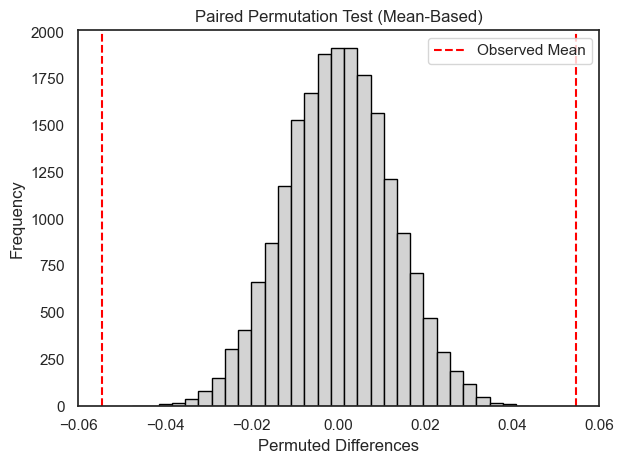

[Mean-based cFES] Observed: 0.054622, P-value: 0.000000000000000000000000000000


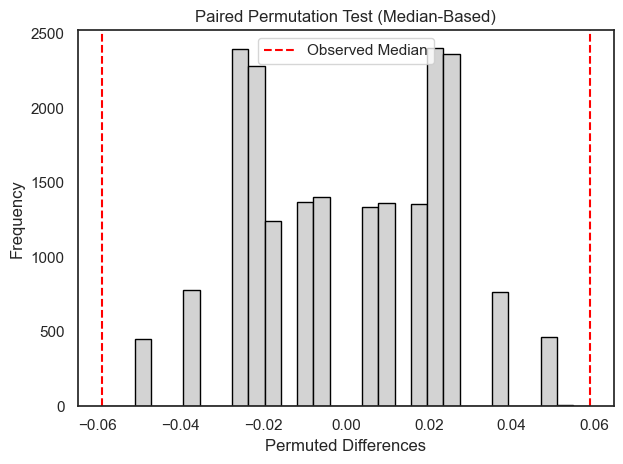

[Median-based cFES] Observed: 0.058824, P-value: 0.000150



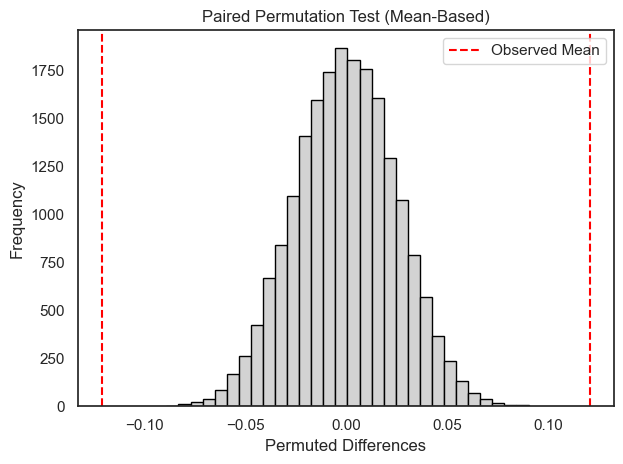

[Mean-based cycling] Observed: -0.120672, P-value: 0.000000000000000000000000000000


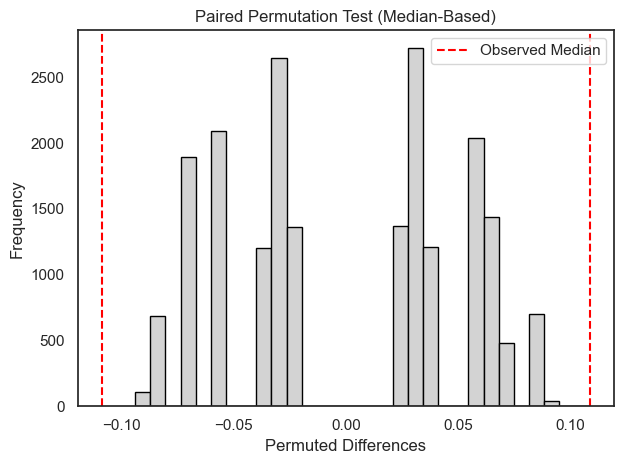

[Median-based cycling] Observed: -0.108824, P-value: 0.000050


In [244]:
# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

# Mean-based permutation test
observed_mean, pval_mean = permutation_test1(x_rec_SMN_cfes, z_rec_SMN_cfes, stat_func=np.mean, n_permutations=20000)
print(f"[Mean-based cFES] Observed: {observed_mean:.6f}, P-value: {pval_mean:.30f}")

# Median-based permutation test
observed_median, pval_median = permutation_test1(x_rec_SMN_cfes, z_rec_SMN_cfes, stat_func=np.median, n_permutations=20000)
print(f"[Median-based cFES] Observed: {observed_median:.6f}, P-value: {pval_median:.6f}\n")


# Mean-based permutation test
observed_mean, pval_mean = permutation_test1(x_rec_SMN_c, z_rec_SMN_c, stat_func=np.mean, n_permutations=20000)
print(f"[Mean-based cycling] Observed: {observed_mean:.6f}, P-value: {pval_mean:.30f}")

# Median-based permutation test
observed_median, pval_median = permutation_test1(x_rec_SMN_c, z_rec_SMN_c, stat_func=np.median, n_permutations=20000)
print(f"[Median-based cycling] Observed: {observed_median:.6f}, P-value: {pval_median:.6f}")


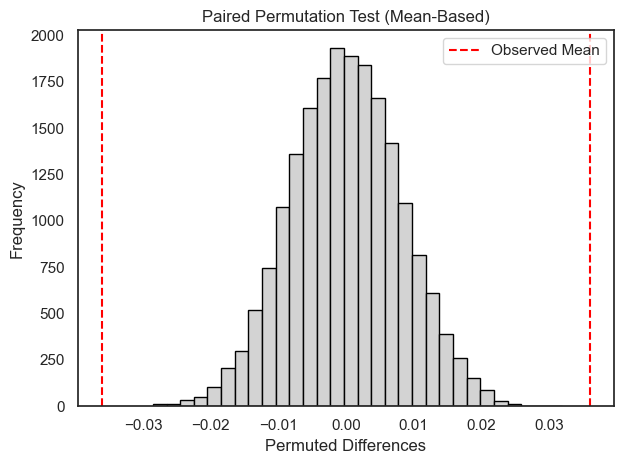

[Mean-based cFES] Observed: 0.036042, P-value: 0.0000000000


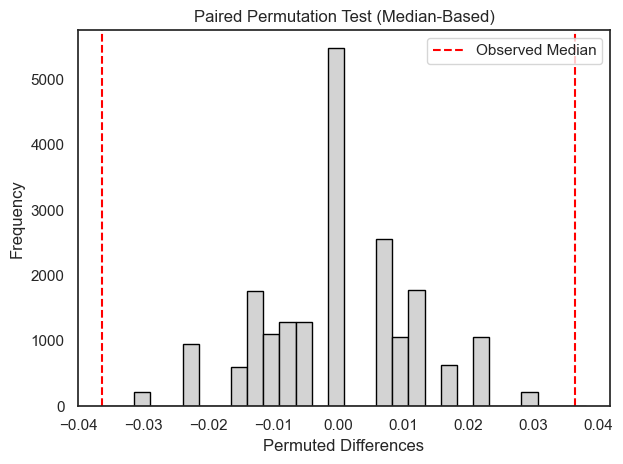

[Median-based cFES] Observed: 0.036364, P-value: 0.0001



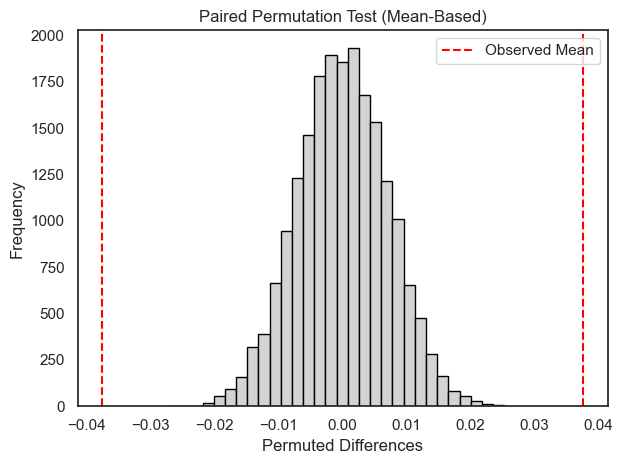

[Mean-based cycling] Observed: -0.037645, P-value: 0.0000000000


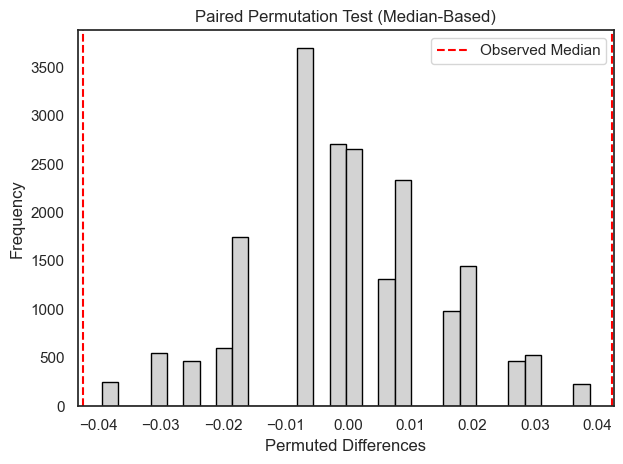

[Median-based cycling] Observed: -0.042424, P-value: 0.0000000000


In [243]:
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

# Mean-based permutation test
observed_mean, pval_mean = permutation_test1(x_int_SMN_cfes, z_int_SMN_cfes, stat_func=np.mean, n_permutations=20000)
print(f"[Mean-based cFES] Observed: {observed_mean:.6f}, P-value: {pval_mean:.30f}")

# Median-based permutation test
observed_median, pval_median = permutation_test1(x_int_SMN_cfes, z_int_SMN_cfes, stat_func=np.median, n_permutations=20000)
print(f"[Median-based cFES] Observed: {observed_median:.6f}, P-value: {pval_median:.4f}\n")


# Mean-based permutation test
observed_mean, pval_mean = permutation_test1(x_int_SMN_c, z_int_SMN_c, stat_func=np.mean, n_permutations=20000)
print(f"[Mean-based cycling] Observed: {observed_mean:.6f}, P-value: {pval_mean:.30f}")

# Median-based permutation test
observed_median, pval_median = permutation_test1(x_int_SMN_c, z_int_SMN_c, stat_func=np.median, n_permutations=20000)
print(f"[Median-based cycling] Observed: {observed_median:.6f}, P-value: {pval_median:.10f}")

In [185]:
pre_cfes = np.array([5, 8,19,43,0,6,5])
post_cfes = np.array([8,11,17,45,0,14,6])

# pre_c = np.array([0,39,4,9])
# post_c = np.array([0,37,6,11]) #3

pre_c = np.array([0,39,4,9,0])
post_c = np.array([0,37,6,11,3])

# pre_cfes = 5, 8,19,43,0,6,5
# post_cfes = 8,11,17,45,0,14,6

# pre_c = 0,39,4,9,0
# post_c = 0,37,6,11

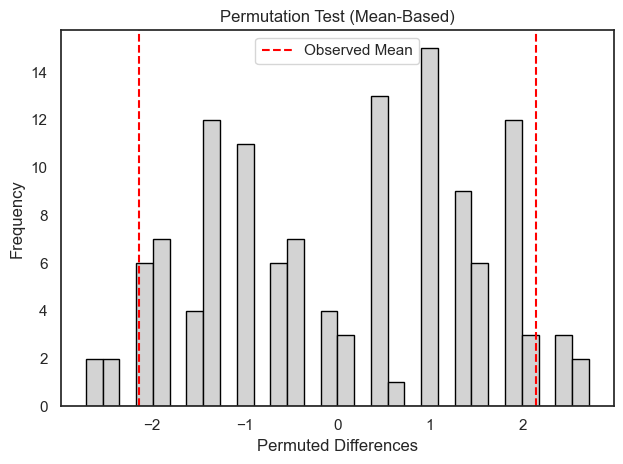

[BM Mean-based cFES] Observed: 2.142857, P-value: 0.140625


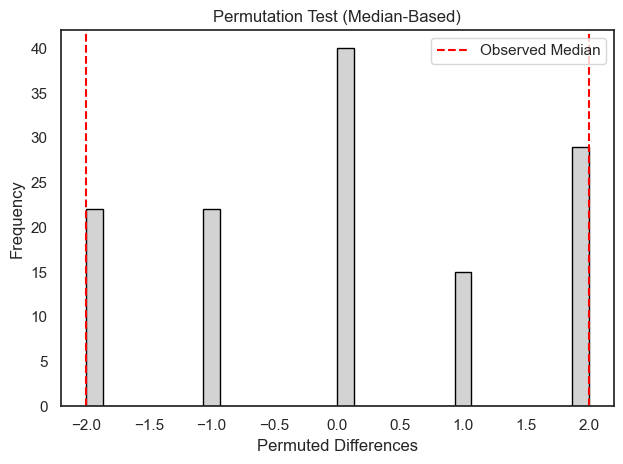

[BM Median-based cFES] Observed: 2.000000, P-value: 0.398438



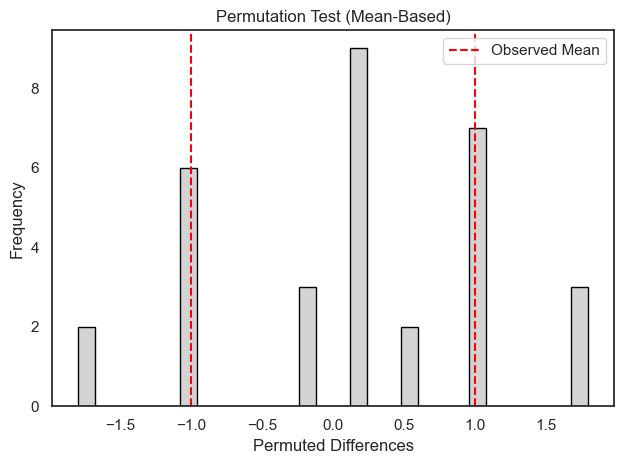

[BM Mean-based c] Observed: 1.000000, P-value: 0.562500


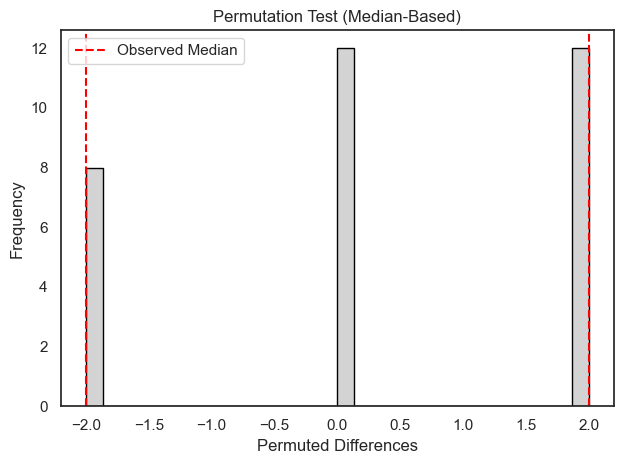

[BM Median-based c] Observed: 2.000000, P-value: 0.625000



In [187]:
# Mean-based permutation test
bm_observed_mean, bm_pval_mean = permutation_test(pre_cfes, post_cfes, stat_func=np.mean, n_permutations=128)
print(f"[BM Mean-based cFES] Observed: {bm_observed_mean:.6f}, P-value: {bm_pval_mean:.6f}")

# Median-based permutation test
bm_observed_median, bm_pval_median = permutation_test(pre_cfes, post_cfes, stat_func=np.median, n_permutations=128)
print(f"[BM Median-based cFES] Observed: {bm_observed_median:.6f}, P-value: {bm_pval_median:.6f}\n")


bm_observed_mean, bm_pval_mean = permutation_test(pre_c, post_c, stat_func=np.mean, n_permutations=32)
print(f"[BM Mean-based c] Observed: {bm_observed_mean:.6f}, P-value: {bm_pval_mean:.6f}")

# Median-based permutation test
bm_observed_median, bm_pval_median = permutation_test(pre_c, post_c, stat_func=np.median, n_permutations=32)
print(f"[BM Median-based c] Observed: {bm_observed_median:.6f}, P-value: {bm_pval_median:.6f}\n")

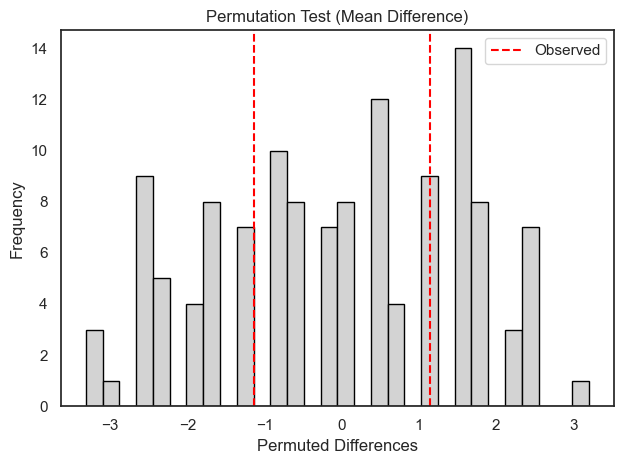

Observed mean difference: 1.142857
Permutation p-value (two-sided): 0.617188


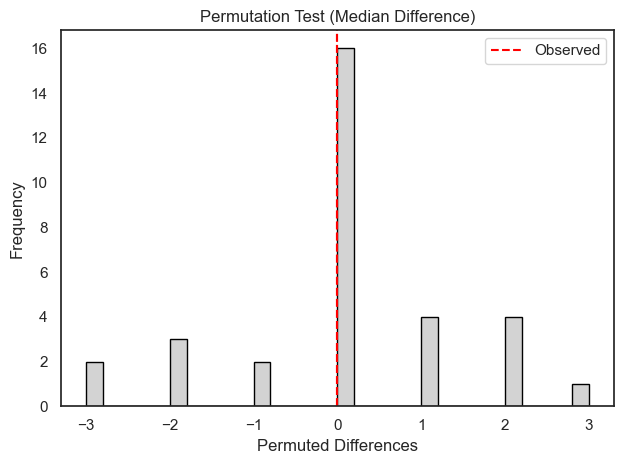

Observed median difference: 0.000000
Permutation p-value (two-sided): 1.000000


In [220]:
import numpy as np
import matplotlib.pyplot as plt


def permutation_test_two_group(change_group1, change_group2, 
                               stat_func=np.mean, n_perms=20000, 
                               random_state=None, plot=True):
    """
    Performs a permutation test comparing two groups of change scores.
    
    Parameters:
    - change_group1, change_group2: Arrays of differences (e.g., post - pre)
    - stat_func: Function to compute statistic (np.mean or np.median)
    - n_perms: Number of permutations
    - random_state: Seed for reproducibility
    - plot: Whether to plot histogram of permutation distribution
    
    Returns:
    - observed_stat: Observed difference
    - p_value: Two-sided p-value
    """
    rng = np.random.default_rng(random_state)

    all_data = np.concatenate([change_group1, change_group2])
    labels = np.array([1] * len(change_group1) + [0] * len(change_group2))

    observed_stat = stat_func(change_group1) - stat_func(change_group2)
    perm_stats = np.empty(n_perms)

    for i in range(n_perms):
        shuffled_labels = rng.permutation(labels)
        perm_group1 = all_data[shuffled_labels == 1]
        perm_group2 = all_data[shuffled_labels == 0]
        perm_stats[i] = stat_func(perm_group1) - stat_func(perm_group2)

    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))

    if plot:
        plt.hist(perm_stats, bins=30, color='lightgray', edgecolor='black')
        plt.axvline(observed_stat, color='red', linestyle='--', label='Observed')
        plt.axvline(-observed_stat, color='red', linestyle='--')
        plt.title(f"Permutation Test ({stat_func.__name__.capitalize()} Difference)")
        plt.xlabel("Permuted Differences")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    print(f"Observed {stat_func.__name__} difference: {observed_stat:.6f}")
    print(f"Permutation p-value (two-sided): {p_value:.6f}")
    
    return observed_stat, p_value


# === Example usage ===
pre_cfes = np.array([5, 8,19,43,0,6,5])
post_cfes = np.array([8,11,17,45,0,14,6])

pre_c = np.array([0,39,4,9,0])
post_c = np.array([0,37,6,11,3])

fes_pre = pre_cfes 
fes_post = post_cfes 
cycling_pre = pre_c 
cycling_post = post_c 

# fes_pre = x_rec_SMN_cfes 
# fes_post = z_rec_SMN_cfes 
# cycling_pre = x_rec_SMN_c 
# cycling_post = z_rec_SMN_c 

# fes_pre = x_int_SMN_cfes 
# fes_post = z_int_SMN_cfes 
# cycling_pre = x_int_SMN_c 
# cycling_post = z_int_SMN_c 

# x_in_SMN z_in_SMN
# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

fes_change = fes_post - fes_pre
cycling_change = cycling_post - cycling_pre

# Run test (mean)
obs_mean, pval_mean = permutation_test_two_group(fes_change, cycling_change, 
                                                  stat_func=np.mean, 
                                                  n_perms=128, 
                                                  random_state=42)

# Optional: Run test (median)
obs_median, pval_median = permutation_test_two_group(fes_change, cycling_change, 
                                                      stat_func=np.median, 
                                                      n_perms=32, 
                                                      random_state=42)


In [231]:
import numpy as np
import matplotlib.pyplot as plt

def permutation_test_mean_diff(group1, group2, n_permutations=10000, random_state=42, plot=True):
    """
    Perform a two-sided permutation test on the difference in means between two groups.

    Parameters:
    - group1, group2: Arrays of sample values
    - n_permutations: Number of random permutations to perform (for Monte Carlo approximation)
    - random_state: Seed for reproducibility
    - plot: Whether to display histogram of permutation distribution

    Returns:
    - observed_diff: Observed mean difference
    - p_value: Two-sided permutation p-value
    """
    rng = np.random.default_rng(random_state)

    group1 = np.asarray(group1)
    group2 = np.asarray(group2)

    all_data = np.concatenate([group1, group2])
    n_group1 = len(group1)

    observed_diff = np.mean(group1) - np.mean(group2)
    perm_diffs = []

    for _ in range(n_permutations):
        permuted = rng.permutation(all_data)
        new_group1 = permuted[:n_group1]
        new_group2 = permuted[n_group1:]
        diff = np.mean(new_group1) - np.mean(new_group2)
        perm_diffs.append(diff)

    perm_diffs = np.array(perm_diffs)
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

    if plot:
        plt.hist(perm_diffs, bins=30, color='lightgray', edgecolor='black')
        plt.axvline(observed_diff, color='red', linestyle='--', label='Observed')
        plt.axvline(-observed_diff, color='red', linestyle='--')
        plt.title("Permutation Test (Mean Difference)")
        plt.xlabel("Mean Differences from Permutations")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    print(f"Observed difference in mean change: {observed_diff:.4f}")
    print(f"Permutation p-value:                {p_value:.4f}")

    return observed_diff, p_value


In [232]:
pre_cfes = np.array([5, 8,19,43,0,6,5])
post_cfes = np.array([8,11,17,45,0,14,6])

pre_c = np.array([0,39,4,9,0])
post_c = np.array([0,37,6,11,3])

fes_pre = pre_cfes 
fes_post = post_cfes 
cycling_pre = pre_c 
cycling_post = post_c 

# fes_pre = x_rec_SMN_cfes 
# fes_post = z_rec_SMN_cfes 
# cycling_pre = x_rec_SMN_c 
# cycling_post = z_rec_SMN_c 

# fes_pre = x_int_SMN_cfes 
# fes_post = z_int_SMN_cfes 
# cycling_pre = x_int_SMN_c 
# cycling_post = z_int_SMN_c 

# x_in_SMN z_in_SMN
# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

fes_change = fes_post - fes_pre
cycling_change = cycling_post - cycling_pre


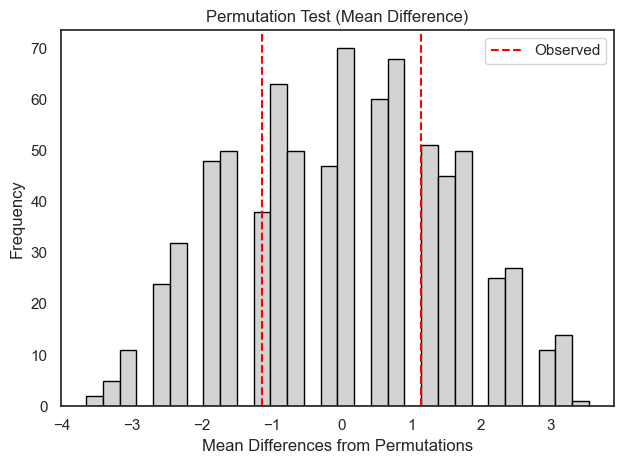

Observed difference in mean change: 1.1429
Permutation p-value:                0.5480


In [234]:
# Run test (mean)
perm_obs_mean, perm_pval_mean = permutation_test_mean_diff(fes_change, cycling_change, n_permutations=792, random_state=42)


In [ ]:
1.1429  0.5480

In [ ]:
# def perm_test_integration(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     diff = np.abs(int_s2 - int_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         int_sp1 = communitymeasures.integration(sp1, static_communities)
#         int_sp2 = communitymeasures.integration(sp2, static_communities)
#         k += diff < np.abs(int_sp2 - int_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# def perm_test_recruitment(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff = np.abs(rec_s2 - rec_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
#         rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
#         k += diff < np.abs(rec_sp2 - rec_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc


# def perm_test_allegiance(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     alg_s1 = communitymeasures.allegiance(s1)
#     alg_s2 = communitymeasures.allegiance(s2)
#     diff = np.abs(alg_s2 - alg_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         alg_sp1 = communitymeasures.allegiance(sp1)
#         alg_sp2 = communitymeasures.allegiance(sp2)
#         k += diff < np.abs(alg_sp2 - alg_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

In [148]:
# def paired_perm_test_integration(s1, s2, nmc):
#     """
#     Paired permutation test on integration scores derived from s1 and s2.

#     Parameters:
#     - s1, s2: (R, S) arrays representing community labels (pre/post or condition1/2)
#     - nmc: Number of Monte Carlo permutations

#     Returns:
#     - p_vals: array of p-values (R,)
#     """
#     n, kk = np.shape(s1)[1], 0
#     static_communities = np.zeros((35,))
#     R = s1.shape[0]  # Number of regions
#     k = np.zeros(R)  # Count exceedances
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     diff = np.abs(int_s2 - int_s1)

#     for i in range(nmc):
#         # Flip labels within pairs (per var)
#         #mask = np.random.rand(s1.shape[1]) < 0.5
#         #perm_s1 = s1.copy()
#         #perm_s2 = s2.copy()
#         #perm_s1[:, mask], perm_s2[:, mask] = s2[:, mask], s1[:, mask]
        
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
#         sp1, sp2 = sp[:,:n], sp[:,n:]

#         int_sp1 = communitymeasures.integration(sp1, static_communities)
#         int_sp2 = communitymeasures.integration(sp2, static_communities)
#         perm_diff = np.abs(int_sp2 - int_sp1)

#         k += perm_diff >= diff  # Count exceedances

#         if i % 10 == 0:
#             print('permutation #: ', i)

#     p_vals = k / nmc
#     return p_vals


# def paired_perm_test_recruitment(s1, s2, nmc):
#     """
#     Paired permutation test on recruitment scores derived from s1 and s2.

#     Parameters:
#     - s1, s2: (R, S) arrays representing community labels (pre/post or condition1/2)
#     - nmc: Number of Monte Carlo permutations

#     Returns:
#     - p_vals: array of p-values (R,)
#     """
#     n, kk = np.shape(s1)[1], 0
#     static_communities = np.zeros((35,))
#     R = s1.shape[0]  # Number of regions
#     k = np.zeros(R)  # Count exceedances
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff = np.abs(rec_s2 - rec_s1)

#     for i in range(nmc):
#         # Flip labels within pairs (per var)
#         #mask = np.random.rand(s1.shape[1]) < 0.5
#         #perm_s1 = s1.copy()
#         #perm_s2 = s2.copy()
#         #perm_s1[:, mask], perm_s2[:, mask] = s2[:, mask], s1[:, mask]
        
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
#         sp1, sp2 = sp[:,:n], sp[:,n:]

#         rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
#         rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
#         perm_diff = np.abs(rec_sp2 - rec_sp1)

#         k += perm_diff >= diff  # Count exceedances

#         if i % 10 == 0:
#             print('permutation #: ', i)

#     p_vals = k / nmc
#     return p_vals

# def paired_perm_test_allegiance(s1, s2, nmc):
#     """
#     Paired permutation test on allegiance matrices from s1 and s2.

#     Parameters:
#     - s1, s2: (R, S) arrays representing community labels (pre/post or condition1/2)
#     - nmc: Number of Monte Carlo permutations

#     Returns:
#     - p_vals: (R, R) array of p-values
#     """
#     R, S = s1.shape
#     k = np.zeros((R, R))  # Count exceedances matrix
#     alg_s1 = communitymeasures.allegiance(s1)  # (R, R)
#     alg_s2 = communitymeasures.allegiance(s2)  # (R, R)
#     diff = np.abs(alg_s2 - alg_s1)  # (R, R)

#     for i in range(nmc):
#         # Flip labels within pairs (for each subject)
#         mask = np.random.rand(S) < 0.5
#         perm_s1 = s1.copy()
#         perm_s2 = s2.copy()
#         perm_s1[:, mask], perm_s2[:, mask] = s2[:, mask], s1[:, mask]

#         # Compute allegiance for permuted
#         alg_perm1 = communitymeasures.allegiance(perm_s1)
#         alg_perm2 = communitymeasures.allegiance(perm_s2)
#         perm_diff = np.abs(alg_perm2 - alg_perm1)

#         # Accumulate exceedances
#         k += (perm_diff >= diff)

#         if i % 10 == 0:
#             print(f'Permutation #: {i}')

#     p_vals = k / nmc
#     return p_vals


### Group Diff - Empirical p-values - v2 (06/12)

In [ ]:
# Recruitment Coefficient
def paired_perm_test_recruitment(s1, s2, nmc):
    """
    Proper paired permutation test on recruitment coefs. between two conditions.

    Parameters:
    - s1, s2: Arrays of shape (R, S), representing community labels
             across R regions and S subjects/runs for two paired conditions.
    - nmc: Number of Monte Carlo permutations.

    Returns:
    - p_vals: Array of p-values of shape (R,), one per brain region.
    """
    R, S = s1.shape  # R = number of regions, S = number of subjects
    static_communities = np.zeros((35,))  # Assumes 35 is correct for your recruitment calc

    # Compute observed recruitment values and difference
    rec_s1 = communitymeasures.recruitment(s1, static_communities)
    rec_s2 = communitymeasures.recruitment(s2, static_communities)
    diff_obs = np.abs(rec_s2 - rec_s1)

    # Initialize counter for number of times permuted diff >= observed diff
    exceedances = np.zeros(R)

    for i in range(nmc):
        # Randomly flip condition labels for half the subjects (paired permutation)
        mask = np.random.rand(S) < 0.5

        # Copy and swap condition labels according to mask
        perm_s1 = s1.copy()
        perm_s2 = s2.copy()
        perm_s1[:, mask], perm_s2[:, mask] = s2[:, mask], s1[:, mask]

        # Compute recruitment for permuted data
        rec_perm1 = communitymeasures.recruitment(perm_s1, static_communities)
        rec_perm2 = communitymeasures.recruitment(perm_s2, static_communities)
        diff_perm = np.abs(rec_perm2 - rec_perm1)

        # Track how many times permuted difference >= observed difference
        exceedances += (diff_perm >= diff_obs)

        if i % 10 == 0:
            print(f"Permutation {i} / {nmc}")

    # Calculate empirical p-values
    p_vals = exceedances / nmc
    return p_vals


# Integration Coefficient
def paired_perm_test_integration(s1, s2, nmc):
    """
    Paired permutation test on integration scores derived from s1 and s2.

    Parameters:
    - s1, s2: Arrays of shape (R, S), community labels (e.g., pre/post or condition1/2)
    - nmc: Number of Monte Carlo permutations

    Returns:
    - p_vals: Array of p-values (R,)
    """
    assert s1.shape == s2.shape, "s1 and s2 must have the same shape"
    R, S = s1.shape  # R = number of regions, S = number of samples/subjects
    static_communities = np.zeros((35,))  # SMN region

    # Observed integration differences
    int_s1 = integration(s1, static_communities)
    int_s2 = integration(s2, static_communities)
    observed_diff = np.abs(int_s2 - int_s1)

    # Initialize permutation exceedance counts
    exceed_count = np.zeros(R)

    for i in range(nmc):
        # Flip s1 and s2 values randomly per column (subject/sample)
        flip_mask = np.random.rand(S) < 0.5  # Boolean mask of length S
        perm_s1 = s1.copy()
        perm_s2 = s2.copy()

        # Swap labels where flip_mask is True (paired permutation)
        perm_s1[:, flip_mask], perm_s2[:, flip_mask] = s2[:, flip_mask], s1[:, flip_mask]

        # Compute integration measures for permuted data
        int_perm_s1 = integration(perm_s1, static_communities)
        int_perm_s2 = integration(perm_s2, static_communities)
        perm_diff = np.abs(int_perm_s2 - int_perm_s1)

        # Count how many times permuted diff >= observed diff
        exceed_count += perm_diff >= observed_diff

        if i % 10 == 0:
            print(f'Permutation #{i}')

    # Compute two-sided p-values
    p_vals = exceed_count / nmc
    return p_vals

# Allegience Matrix
def paired_perm_test_allegiance(s1, s2, nmc):
    """
    Paired permutation test on allegiance scores derived from s1 and s2.

    Parameters:
    - s1, s2: Arrays of shape (R, S), community labels (e.g., pre/post or condition1/2)
    - nmc: Number of Monte Carlo permutations

    Returns:
    - p_vals: Array of p-values (R, R) for each pair of regions
    """
    assert s1.shape == s2.shape, "s1 and s2 must have the same shape"
    R, S = s1.shape  # R = number of regions, S = number of samples/subjects

    # Compute observed allegiance matrices and difference
    alg_s1 = communitymeasures.allegiance(s1)  # Shape (R, R)
    alg_s2 = communitymeasures.allegiance(s2)  # Shape (R, R)
    observed_diff = np.abs(alg_s2 - alg_s1)

    # Initialize exceedance count matrix
    exceed_count = np.zeros((R, R))

    for i in range(nmc):
        # Paired permutation via random column swaps
        flip_mask = np.random.rand(S) < 0.5
        perm_s1 = s1.copy()
        perm_s2 = s2.copy()
        perm_s1[:, flip_mask], perm_s2[:, flip_mask] = s2[:, flip_mask], s1[:, flip_mask]

        # Compute permuted allegiance and difference
        alg_perm_s1 = communitymeasures.allegiance(perm_s1)
        alg_perm_s2 = communitymeasures.allegiance(perm_s2)
        perm_diff = np.abs(alg_perm_s2 - alg_perm_s1)

        # Update count matrix
        exceed_count += perm_diff >= observed_diff

        if i % 10 == 0:
            print(f'Permutation #{i}')

    # Compute p-values
    p_vals = exceed_count / nmc
    return p_vals



In [149]:
# cl_pre_SMN_cfes, cl_post_SMN_cfes
# cl_pre_SMN_c, cl_post_SMN_c

# x_alg_SMN_cfes, z_alg_SMN_cfes
# x_alg_SMN_c, z_alg_SMN_c

# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

In [150]:
rec_pvalue_cfes = paired_perm_test_recruitment(cl_pre_SMN_cfes, cl_post_SMN_cfes, nmc=20000)
int_pvalue_cfes = paired_perm_test_integration(cl_pre_SMN_cfes, cl_post_SMN_cfes, nmc=20000)

rec_pvalue_c = paired_perm_test_recruitment(cl_pre_SMN_c, cl_post_SMN_c, nmc=20000)
int_pvalue_c = paired_perm_test_integration(cl_pre_SMN_c, cl_post_SMN_c, nmc=20000)

permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  100
permutation #:  110
permutation #:  120
permutation #:  130
permutation #:  140
permutation #:  150
permutation #:  160
permutation #:  170
permutation #:  180
permutation #:  190
permutation #:  200
permutation #:  210
permutation #:  220
permutation #:  230
permutation #:  240
permutation #:  250
permutation #:  260
permutation #:  270
permutation #:  280
permutation #:  290
permutation #:  300
permutation #:  310
permutation #:  320
permutation #:  330
permutation #:  340
permutation #:  350
permutation #:  360
permutation #:  370
permutation #:  380
permutation #:  390
permutation #:  400
permutation #:  410
permutation #:  420
permutation #:  430
permutation #:  440
permutation #:  450
permutation #:  460
permutation #:  470
permutation #:  480
permutation #:  490
permutation

permutation #:  3970
permutation #:  3980
permutation #:  3990
permutation #:  4000
permutation #:  4010
permutation #:  4020
permutation #:  4030
permutation #:  4040
permutation #:  4050
permutation #:  4060
permutation #:  4070
permutation #:  4080
permutation #:  4090
permutation #:  4100
permutation #:  4110
permutation #:  4120
permutation #:  4130
permutation #:  4140
permutation #:  4150
permutation #:  4160
permutation #:  4170
permutation #:  4180
permutation #:  4190
permutation #:  4200
permutation #:  4210
permutation #:  4220
permutation #:  4230
permutation #:  4240
permutation #:  4250
permutation #:  4260
permutation #:  4270
permutation #:  4280
permutation #:  4290
permutation #:  4300
permutation #:  4310
permutation #:  4320
permutation #:  4330
permutation #:  4340
permutation #:  4350
permutation #:  4360
permutation #:  4370
permutation #:  4380
permutation #:  4390
permutation #:  4400
permutation #:  4410
permutation #:  4420
permutation #:  4430
permutation #

permutation #:  7910
permutation #:  7920
permutation #:  7930
permutation #:  7940
permutation #:  7950
permutation #:  7960
permutation #:  7970
permutation #:  7980
permutation #:  7990
permutation #:  8000
permutation #:  8010
permutation #:  8020
permutation #:  8030
permutation #:  8040
permutation #:  8050
permutation #:  8060
permutation #:  8070
permutation #:  8080
permutation #:  8090
permutation #:  8100
permutation #:  8110
permutation #:  8120
permutation #:  8130
permutation #:  8140
permutation #:  8150
permutation #:  8160
permutation #:  8170
permutation #:  8180
permutation #:  8190
permutation #:  8200
permutation #:  8210
permutation #:  8220
permutation #:  8230
permutation #:  8240
permutation #:  8250
permutation #:  8260
permutation #:  8270
permutation #:  8280
permutation #:  8290
permutation #:  8300
permutation #:  8310
permutation #:  8320
permutation #:  8330
permutation #:  8340
permutation #:  8350
permutation #:  8360
permutation #:  8370
permutation #

permutation #:  11740
permutation #:  11750
permutation #:  11760
permutation #:  11770
permutation #:  11780
permutation #:  11790
permutation #:  11800
permutation #:  11810
permutation #:  11820
permutation #:  11830
permutation #:  11840
permutation #:  11850
permutation #:  11860
permutation #:  11870
permutation #:  11880
permutation #:  11890
permutation #:  11900
permutation #:  11910
permutation #:  11920
permutation #:  11930
permutation #:  11940
permutation #:  11950
permutation #:  11960
permutation #:  11970
permutation #:  11980
permutation #:  11990
permutation #:  12000
permutation #:  12010
permutation #:  12020
permutation #:  12030
permutation #:  12040
permutation #:  12050
permutation #:  12060
permutation #:  12070
permutation #:  12080
permutation #:  12090
permutation #:  12100
permutation #:  12110
permutation #:  12120
permutation #:  12130
permutation #:  12140
permutation #:  12150
permutation #:  12160
permutation #:  12170
permutation #:  12180
permutatio

permutation #:  15520
permutation #:  15530
permutation #:  15540
permutation #:  15550
permutation #:  15560
permutation #:  15570
permutation #:  15580
permutation #:  15590
permutation #:  15600
permutation #:  15610
permutation #:  15620
permutation #:  15630
permutation #:  15640
permutation #:  15650
permutation #:  15660
permutation #:  15670
permutation #:  15680
permutation #:  15690
permutation #:  15700
permutation #:  15710
permutation #:  15720
permutation #:  15730
permutation #:  15740
permutation #:  15750
permutation #:  15760
permutation #:  15770
permutation #:  15780
permutation #:  15790
permutation #:  15800
permutation #:  15810
permutation #:  15820
permutation #:  15830
permutation #:  15840
permutation #:  15850
permutation #:  15860
permutation #:  15870
permutation #:  15880
permutation #:  15890
permutation #:  15900
permutation #:  15910
permutation #:  15920
permutation #:  15930
permutation #:  15940
permutation #:  15950
permutation #:  15960
permutatio

permutation #:  19270
permutation #:  19280
permutation #:  19290
permutation #:  19300
permutation #:  19310
permutation #:  19320
permutation #:  19330
permutation #:  19340
permutation #:  19350
permutation #:  19360
permutation #:  19370
permutation #:  19380
permutation #:  19390
permutation #:  19400
permutation #:  19410
permutation #:  19420
permutation #:  19430
permutation #:  19440
permutation #:  19450
permutation #:  19460
permutation #:  19470
permutation #:  19480
permutation #:  19490
permutation #:  19500
permutation #:  19510
permutation #:  19520
permutation #:  19530
permutation #:  19540
permutation #:  19550
permutation #:  19560
permutation #:  19570
permutation #:  19580
permutation #:  19590
permutation #:  19600
permutation #:  19610
permutation #:  19620
permutation #:  19630
permutation #:  19640
permutation #:  19650
permutation #:  19660
permutation #:  19670
permutation #:  19680
permutation #:  19690
permutation #:  19700
permutation #:  19710
permutatio

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/teneto/communitymeasures/integration.py:47: RuntimeWarning: Mean of empty slice
  integration_coeff[i] = np.nanmean(alleg[i, staticcommunities != statcom])


permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  100
permutation #:  110
permutation #:  120
permutation #:  130
permutation #:  140
permutation #:  150
permutation #:  160
permutation #:  170
permutation #:  180
permutation #:  190
permutation #:  200
permutation #:  210
permutation #:  220
permutation #:  230
permutation #:  240
permutation #:  250
permutation #:  260
permutation #:  270
permutation #:  280
permutation #:  290
permutation #:  300
permutation #:  310
permutation #:  320
permutation #:  330
permutation #:  340
permutation #:  350
permutation #:  360
permutation #:  370
permutation #:  380
permutation #:  390
permutation #:  400
permutation #:  410
permutation #:  420
permutation #:  430
permutation #:  440
permutation #:  450
permutation #:  460
permutation #:  470
permutation #:  480
permutation #:  490
permutation #:  500
permutation #:  510
permutation #:  520
permutation #:  530
permutation #:  540
permu

permutation #:  4010
permutation #:  4020
permutation #:  4030
permutation #:  4040
permutation #:  4050
permutation #:  4060
permutation #:  4070
permutation #:  4080
permutation #:  4090
permutation #:  4100
permutation #:  4110
permutation #:  4120
permutation #:  4130
permutation #:  4140
permutation #:  4150
permutation #:  4160
permutation #:  4170
permutation #:  4180
permutation #:  4190
permutation #:  4200
permutation #:  4210
permutation #:  4220
permutation #:  4230
permutation #:  4240
permutation #:  4250
permutation #:  4260
permutation #:  4270
permutation #:  4280
permutation #:  4290
permutation #:  4300
permutation #:  4310
permutation #:  4320
permutation #:  4330
permutation #:  4340
permutation #:  4350
permutation #:  4360
permutation #:  4370
permutation #:  4380
permutation #:  4390
permutation #:  4400
permutation #:  4410
permutation #:  4420
permutation #:  4430
permutation #:  4440
permutation #:  4450
permutation #:  4460
permutation #:  4470
permutation #

permutation #:  7940
permutation #:  7950
permutation #:  7960
permutation #:  7970
permutation #:  7980
permutation #:  7990
permutation #:  8000
permutation #:  8010
permutation #:  8020
permutation #:  8030
permutation #:  8040
permutation #:  8050
permutation #:  8060
permutation #:  8070
permutation #:  8080
permutation #:  8090
permutation #:  8100
permutation #:  8110
permutation #:  8120
permutation #:  8130
permutation #:  8140
permutation #:  8150
permutation #:  8160
permutation #:  8170
permutation #:  8180
permutation #:  8190
permutation #:  8200
permutation #:  8210
permutation #:  8220
permutation #:  8230
permutation #:  8240
permutation #:  8250
permutation #:  8260
permutation #:  8270
permutation #:  8280
permutation #:  8290
permutation #:  8300
permutation #:  8310
permutation #:  8320
permutation #:  8330
permutation #:  8340
permutation #:  8350
permutation #:  8360
permutation #:  8370
permutation #:  8380
permutation #:  8390
permutation #:  8400
permutation #

permutation #:  11770
permutation #:  11780
permutation #:  11790
permutation #:  11800
permutation #:  11810
permutation #:  11820
permutation #:  11830
permutation #:  11840
permutation #:  11850
permutation #:  11860
permutation #:  11870
permutation #:  11880
permutation #:  11890
permutation #:  11900
permutation #:  11910
permutation #:  11920
permutation #:  11930
permutation #:  11940
permutation #:  11950
permutation #:  11960
permutation #:  11970
permutation #:  11980
permutation #:  11990
permutation #:  12000
permutation #:  12010
permutation #:  12020
permutation #:  12030
permutation #:  12040
permutation #:  12050
permutation #:  12060
permutation #:  12070
permutation #:  12080
permutation #:  12090
permutation #:  12100
permutation #:  12110
permutation #:  12120
permutation #:  12130
permutation #:  12140
permutation #:  12150
permutation #:  12160
permutation #:  12170
permutation #:  12180
permutation #:  12190
permutation #:  12200
permutation #:  12210
permutatio

permutation #:  15500
permutation #:  15510
permutation #:  15520
permutation #:  15530
permutation #:  15540
permutation #:  15550
permutation #:  15560
permutation #:  15570
permutation #:  15580
permutation #:  15590
permutation #:  15600
permutation #:  15610
permutation #:  15620
permutation #:  15630
permutation #:  15640
permutation #:  15650
permutation #:  15660
permutation #:  15670
permutation #:  15680
permutation #:  15690
permutation #:  15700
permutation #:  15710
permutation #:  15720
permutation #:  15730
permutation #:  15740
permutation #:  15750
permutation #:  15760
permutation #:  15770
permutation #:  15780
permutation #:  15790
permutation #:  15800
permutation #:  15810
permutation #:  15820
permutation #:  15830
permutation #:  15840
permutation #:  15850
permutation #:  15860
permutation #:  15870
permutation #:  15880
permutation #:  15890
permutation #:  15900
permutation #:  15910
permutation #:  15920
permutation #:  15930
permutation #:  15940
permutatio

permutation #:  19230
permutation #:  19240
permutation #:  19250
permutation #:  19260
permutation #:  19270
permutation #:  19280
permutation #:  19290
permutation #:  19300
permutation #:  19310
permutation #:  19320
permutation #:  19330
permutation #:  19340
permutation #:  19350
permutation #:  19360
permutation #:  19370
permutation #:  19380
permutation #:  19390
permutation #:  19400
permutation #:  19410
permutation #:  19420
permutation #:  19430
permutation #:  19440
permutation #:  19450
permutation #:  19460
permutation #:  19470
permutation #:  19480
permutation #:  19490
permutation #:  19500
permutation #:  19510
permutation #:  19520
permutation #:  19530
permutation #:  19540
permutation #:  19550
permutation #:  19560
permutation #:  19570
permutation #:  19580
permutation #:  19590
permutation #:  19600
permutation #:  19610
permutation #:  19620
permutation #:  19630
permutation #:  19640
permutation #:  19650
permutation #:  19660
permutation #:  19670
permutatio

permutation #:  3150
permutation #:  3160
permutation #:  3170
permutation #:  3180
permutation #:  3190
permutation #:  3200
permutation #:  3210
permutation #:  3220
permutation #:  3230
permutation #:  3240
permutation #:  3250
permutation #:  3260
permutation #:  3270
permutation #:  3280
permutation #:  3290
permutation #:  3300
permutation #:  3310
permutation #:  3320
permutation #:  3330
permutation #:  3340
permutation #:  3350
permutation #:  3360
permutation #:  3370
permutation #:  3380
permutation #:  3390
permutation #:  3400
permutation #:  3410
permutation #:  3420
permutation #:  3430
permutation #:  3440
permutation #:  3450
permutation #:  3460
permutation #:  3470
permutation #:  3480
permutation #:  3490
permutation #:  3500
permutation #:  3510
permutation #:  3520
permutation #:  3530
permutation #:  3540
permutation #:  3550
permutation #:  3560
permutation #:  3570
permutation #:  3580
permutation #:  3590
permutation #:  3600
permutation #:  3610
permutation #

permutation #:  7070
permutation #:  7080
permutation #:  7090
permutation #:  7100
permutation #:  7110
permutation #:  7120
permutation #:  7130
permutation #:  7140
permutation #:  7150
permutation #:  7160
permutation #:  7170
permutation #:  7180
permutation #:  7190
permutation #:  7200
permutation #:  7210
permutation #:  7220
permutation #:  7230
permutation #:  7240
permutation #:  7250
permutation #:  7260
permutation #:  7270
permutation #:  7280
permutation #:  7290
permutation #:  7300
permutation #:  7310
permutation #:  7320
permutation #:  7330
permutation #:  7340
permutation #:  7350
permutation #:  7360
permutation #:  7370
permutation #:  7380
permutation #:  7390
permutation #:  7400
permutation #:  7410
permutation #:  7420
permutation #:  7430
permutation #:  7440
permutation #:  7450
permutation #:  7460
permutation #:  7470
permutation #:  7480
permutation #:  7490
permutation #:  7500
permutation #:  7510
permutation #:  7520
permutation #:  7530
permutation #

permutation #:  10940
permutation #:  10950
permutation #:  10960
permutation #:  10970
permutation #:  10980
permutation #:  10990
permutation #:  11000
permutation #:  11010
permutation #:  11020
permutation #:  11030
permutation #:  11040
permutation #:  11050
permutation #:  11060
permutation #:  11070
permutation #:  11080
permutation #:  11090
permutation #:  11100
permutation #:  11110
permutation #:  11120
permutation #:  11130
permutation #:  11140
permutation #:  11150
permutation #:  11160
permutation #:  11170
permutation #:  11180
permutation #:  11190
permutation #:  11200
permutation #:  11210
permutation #:  11220
permutation #:  11230
permutation #:  11240
permutation #:  11250
permutation #:  11260
permutation #:  11270
permutation #:  11280
permutation #:  11290
permutation #:  11300
permutation #:  11310
permutation #:  11320
permutation #:  11330
permutation #:  11340
permutation #:  11350
permutation #:  11360
permutation #:  11370
permutation #:  11380
permutatio

permutation #:  14680
permutation #:  14690
permutation #:  14700
permutation #:  14710
permutation #:  14720
permutation #:  14730
permutation #:  14740
permutation #:  14750
permutation #:  14760
permutation #:  14770
permutation #:  14780
permutation #:  14790
permutation #:  14800
permutation #:  14810
permutation #:  14820
permutation #:  14830
permutation #:  14840
permutation #:  14850
permutation #:  14860
permutation #:  14870
permutation #:  14880
permutation #:  14890
permutation #:  14900
permutation #:  14910
permutation #:  14920
permutation #:  14930
permutation #:  14940
permutation #:  14950
permutation #:  14960
permutation #:  14970
permutation #:  14980
permutation #:  14990
permutation #:  15000
permutation #:  15010
permutation #:  15020
permutation #:  15030
permutation #:  15040
permutation #:  15050
permutation #:  15060
permutation #:  15070
permutation #:  15080
permutation #:  15090
permutation #:  15100
permutation #:  15110
permutation #:  15120
permutatio

permutation #:  18430
permutation #:  18440
permutation #:  18450
permutation #:  18460
permutation #:  18470
permutation #:  18480
permutation #:  18490
permutation #:  18500
permutation #:  18510
permutation #:  18520
permutation #:  18530
permutation #:  18540
permutation #:  18550
permutation #:  18560
permutation #:  18570
permutation #:  18580
permutation #:  18590
permutation #:  18600
permutation #:  18610
permutation #:  18620
permutation #:  18630
permutation #:  18640
permutation #:  18650
permutation #:  18660
permutation #:  18670
permutation #:  18680
permutation #:  18690
permutation #:  18700
permutation #:  18710
permutation #:  18720
permutation #:  18730
permutation #:  18740
permutation #:  18750
permutation #:  18760
permutation #:  18770
permutation #:  18780
permutation #:  18790
permutation #:  18800
permutation #:  18810
permutation #:  18820
permutation #:  18830
permutation #:  18840
permutation #:  18850
permutation #:  18860
permutation #:  18870
permutatio

permutation #:  2360
permutation #:  2370
permutation #:  2380
permutation #:  2390
permutation #:  2400
permutation #:  2410
permutation #:  2420
permutation #:  2430
permutation #:  2440
permutation #:  2450
permutation #:  2460
permutation #:  2470
permutation #:  2480
permutation #:  2490
permutation #:  2500
permutation #:  2510
permutation #:  2520
permutation #:  2530
permutation #:  2540
permutation #:  2550
permutation #:  2560
permutation #:  2570
permutation #:  2580
permutation #:  2590
permutation #:  2600
permutation #:  2610
permutation #:  2620
permutation #:  2630
permutation #:  2640
permutation #:  2650
permutation #:  2660
permutation #:  2670
permutation #:  2680
permutation #:  2690
permutation #:  2700
permutation #:  2710
permutation #:  2720
permutation #:  2730
permutation #:  2740
permutation #:  2750
permutation #:  2760
permutation #:  2770
permutation #:  2780
permutation #:  2790
permutation #:  2800
permutation #:  2810
permutation #:  2820
permutation #

permutation #:  6280
permutation #:  6290
permutation #:  6300
permutation #:  6310
permutation #:  6320
permutation #:  6330
permutation #:  6340
permutation #:  6350
permutation #:  6360
permutation #:  6370
permutation #:  6380
permutation #:  6390
permutation #:  6400
permutation #:  6410
permutation #:  6420
permutation #:  6430
permutation #:  6440
permutation #:  6450
permutation #:  6460
permutation #:  6470
permutation #:  6480
permutation #:  6490
permutation #:  6500
permutation #:  6510
permutation #:  6520
permutation #:  6530
permutation #:  6540
permutation #:  6550
permutation #:  6560
permutation #:  6570
permutation #:  6580
permutation #:  6590
permutation #:  6600
permutation #:  6610
permutation #:  6620
permutation #:  6630
permutation #:  6640
permutation #:  6650
permutation #:  6660
permutation #:  6670
permutation #:  6680
permutation #:  6690
permutation #:  6700
permutation #:  6710
permutation #:  6720
permutation #:  6730
permutation #:  6740
permutation #

permutation #:  10210
permutation #:  10220
permutation #:  10230
permutation #:  10240
permutation #:  10250
permutation #:  10260
permutation #:  10270
permutation #:  10280
permutation #:  10290
permutation #:  10300
permutation #:  10310
permutation #:  10320
permutation #:  10330
permutation #:  10340
permutation #:  10350
permutation #:  10360
permutation #:  10370
permutation #:  10380
permutation #:  10390
permutation #:  10400
permutation #:  10410
permutation #:  10420
permutation #:  10430
permutation #:  10440
permutation #:  10450
permutation #:  10460
permutation #:  10470
permutation #:  10480
permutation #:  10490
permutation #:  10500
permutation #:  10510
permutation #:  10520
permutation #:  10530
permutation #:  10540
permutation #:  10550
permutation #:  10560
permutation #:  10570
permutation #:  10580
permutation #:  10590
permutation #:  10600
permutation #:  10610
permutation #:  10620
permutation #:  10630
permutation #:  10640
permutation #:  10650
permutatio

permutation #:  13970
permutation #:  13980
permutation #:  13990
permutation #:  14000
permutation #:  14010
permutation #:  14020
permutation #:  14030
permutation #:  14040
permutation #:  14050
permutation #:  14060
permutation #:  14070
permutation #:  14080
permutation #:  14090
permutation #:  14100
permutation #:  14110
permutation #:  14120
permutation #:  14130
permutation #:  14140
permutation #:  14150
permutation #:  14160
permutation #:  14170
permutation #:  14180
permutation #:  14190
permutation #:  14200
permutation #:  14210
permutation #:  14220
permutation #:  14230
permutation #:  14240
permutation #:  14250
permutation #:  14260
permutation #:  14270
permutation #:  14280
permutation #:  14290
permutation #:  14300
permutation #:  14310
permutation #:  14320
permutation #:  14330
permutation #:  14340
permutation #:  14350
permutation #:  14360
permutation #:  14370
permutation #:  14380
permutation #:  14390
permutation #:  14400
permutation #:  14410
permutatio

permutation #:  17740
permutation #:  17750
permutation #:  17760
permutation #:  17770
permutation #:  17780
permutation #:  17790
permutation #:  17800
permutation #:  17810
permutation #:  17820
permutation #:  17830
permutation #:  17840
permutation #:  17850
permutation #:  17860
permutation #:  17870
permutation #:  17880
permutation #:  17890
permutation #:  17900
permutation #:  17910
permutation #:  17920
permutation #:  17930
permutation #:  17940
permutation #:  17950
permutation #:  17960
permutation #:  17970
permutation #:  17980
permutation #:  17990
permutation #:  18000
permutation #:  18010
permutation #:  18020
permutation #:  18030
permutation #:  18040
permutation #:  18050
permutation #:  18060
permutation #:  18070
permutation #:  18080
permutation #:  18090
permutation #:  18100
permutation #:  18110
permutation #:  18120
permutation #:  18130
permutation #:  18140
permutation #:  18150
permutation #:  18160
permutation #:  18170
permutation #:  18180
permutatio

In [156]:
print(f"Recruitment p-value cFES shape: {rec_pvalue_cfes.shape}-{rec_pvalue_cfes}\n\n")
print(f"Integration p-value cFES shape: {int_pvalue_cfes.shape}-{int_pvalue_cfes}")

print(f"Recruitment p-value cycling shape: {rec_pvalue_c.shape}-{rec_pvalue_c}\n\n")
print(f"Integration p-value cycling shape: {int_pvalue_c.shape}-{int_pvalue_c}")

Recruitment p-value cFES shape: (35,)-[0.3515  0.53695 0.56895 0.7175  0.71795 0.492   0.61585 0.97055 0.725
 0.2875  0.61025 0.61395 0.75635 0.72045 0.62745 0.7986  0.64135 0.4108
 0.4688  0.6416  0.64055 0.5292  0.2595  0.572   0.8082  0.3822  0.9309
 0.2419  0.84225 0.2463  0.87265 0.4041  0.5567  0.4321  0.8414 ]


Integration p-value cFES shape: (35,)-[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recruitment p-value cycling shape: (35,)-[0.85    0.71445 0.4264  0.4671  0.42615 0.07495 0.4866  0.5167  0.86055
 0.34625 0.14835 0.34655 0.2527  0.01765 0.83905 0.25935 0.3563  0.71445
 0.4269  0.4257  0.6234  0.1293  0.0695  0.86305 0.1674  0.3403  0.5176
 0.3686  0.2527  0.2588  0.2588  0.03655 0.21085 0.35835 0.2588 ]


Integration p-value cycling shape: (35,)-[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [152]:
# rec_pvalue_cfes
# int_pvalue_cfes
# rec_pvalue_c
# int_pvalue_c
# alg_pvalue_cfes
# alg_pvalue_c

In [153]:
alg_pvalue_cfes = paired_perm_test_allegiance(cl_pre_SMN_cfes, cl_post_SMN_cfes, nmc=20000)
alg_pvalue_c = paired_perm_test_allegiance(cl_pre_SMN_c, cl_post_SMN_c, nmc=20000)

Permutation #: 0
Permutation #: 10
Permutation #: 20
Permutation #: 30
Permutation #: 40
Permutation #: 50
Permutation #: 60
Permutation #: 70
Permutation #: 80
Permutation #: 90
Permutation #: 100
Permutation #: 110
Permutation #: 120
Permutation #: 130
Permutation #: 140
Permutation #: 150
Permutation #: 160
Permutation #: 170
Permutation #: 180
Permutation #: 190
Permutation #: 200
Permutation #: 210
Permutation #: 220
Permutation #: 230
Permutation #: 240
Permutation #: 250
Permutation #: 260
Permutation #: 270
Permutation #: 280
Permutation #: 290
Permutation #: 300
Permutation #: 310
Permutation #: 320
Permutation #: 330
Permutation #: 340
Permutation #: 350
Permutation #: 360
Permutation #: 370
Permutation #: 380
Permutation #: 390
Permutation #: 400
Permutation #: 410
Permutation #: 420
Permutation #: 430
Permutation #: 440
Permutation #: 450
Permutation #: 460
Permutation #: 470
Permutation #: 480
Permutation #: 490
Permutation #: 500
Permutation #: 510
Permutation #: 520
Perm

Permutation #: 4200
Permutation #: 4210
Permutation #: 4220
Permutation #: 4230
Permutation #: 4240
Permutation #: 4250
Permutation #: 4260
Permutation #: 4270
Permutation #: 4280
Permutation #: 4290
Permutation #: 4300
Permutation #: 4310
Permutation #: 4320
Permutation #: 4330
Permutation #: 4340
Permutation #: 4350
Permutation #: 4360
Permutation #: 4370
Permutation #: 4380
Permutation #: 4390
Permutation #: 4400
Permutation #: 4410
Permutation #: 4420
Permutation #: 4430
Permutation #: 4440
Permutation #: 4450
Permutation #: 4460
Permutation #: 4470
Permutation #: 4480
Permutation #: 4490
Permutation #: 4500
Permutation #: 4510
Permutation #: 4520
Permutation #: 4530
Permutation #: 4540
Permutation #: 4550
Permutation #: 4560
Permutation #: 4570
Permutation #: 4580
Permutation #: 4590
Permutation #: 4600
Permutation #: 4610
Permutation #: 4620
Permutation #: 4630
Permutation #: 4640
Permutation #: 4650
Permutation #: 4660
Permutation #: 4670
Permutation #: 4680
Permutation #: 4690


Permutation #: 8300
Permutation #: 8310
Permutation #: 8320
Permutation #: 8330
Permutation #: 8340
Permutation #: 8350
Permutation #: 8360
Permutation #: 8370
Permutation #: 8380
Permutation #: 8390
Permutation #: 8400
Permutation #: 8410
Permutation #: 8420
Permutation #: 8430
Permutation #: 8440
Permutation #: 8450
Permutation #: 8460
Permutation #: 8470
Permutation #: 8480
Permutation #: 8490
Permutation #: 8500
Permutation #: 8510
Permutation #: 8520
Permutation #: 8530
Permutation #: 8540
Permutation #: 8550
Permutation #: 8560
Permutation #: 8570
Permutation #: 8580
Permutation #: 8590
Permutation #: 8600
Permutation #: 8610
Permutation #: 8620
Permutation #: 8630
Permutation #: 8640
Permutation #: 8650
Permutation #: 8660
Permutation #: 8670
Permutation #: 8680
Permutation #: 8690
Permutation #: 8700
Permutation #: 8710
Permutation #: 8720
Permutation #: 8730
Permutation #: 8740
Permutation #: 8750
Permutation #: 8760
Permutation #: 8770
Permutation #: 8780
Permutation #: 8790


Permutation #: 12290
Permutation #: 12300
Permutation #: 12310
Permutation #: 12320
Permutation #: 12330
Permutation #: 12340
Permutation #: 12350
Permutation #: 12360
Permutation #: 12370
Permutation #: 12380
Permutation #: 12390
Permutation #: 12400
Permutation #: 12410
Permutation #: 12420
Permutation #: 12430
Permutation #: 12440
Permutation #: 12450
Permutation #: 12460
Permutation #: 12470
Permutation #: 12480
Permutation #: 12490
Permutation #: 12500
Permutation #: 12510
Permutation #: 12520
Permutation #: 12530
Permutation #: 12540
Permutation #: 12550
Permutation #: 12560
Permutation #: 12570
Permutation #: 12580
Permutation #: 12590
Permutation #: 12600
Permutation #: 12610
Permutation #: 12620
Permutation #: 12630
Permutation #: 12640
Permutation #: 12650
Permutation #: 12660
Permutation #: 12670
Permutation #: 12680
Permutation #: 12690
Permutation #: 12700
Permutation #: 12710
Permutation #: 12720
Permutation #: 12730
Permutation #: 12740
Permutation #: 12750
Permutation #

Permutation #: 16210
Permutation #: 16220
Permutation #: 16230
Permutation #: 16240
Permutation #: 16250
Permutation #: 16260
Permutation #: 16270
Permutation #: 16280
Permutation #: 16290
Permutation #: 16300
Permutation #: 16310
Permutation #: 16320
Permutation #: 16330
Permutation #: 16340
Permutation #: 16350
Permutation #: 16360
Permutation #: 16370
Permutation #: 16380
Permutation #: 16390
Permutation #: 16400
Permutation #: 16410
Permutation #: 16420
Permutation #: 16430
Permutation #: 16440
Permutation #: 16450
Permutation #: 16460
Permutation #: 16470
Permutation #: 16480
Permutation #: 16490
Permutation #: 16500
Permutation #: 16510
Permutation #: 16520
Permutation #: 16530
Permutation #: 16540
Permutation #: 16550
Permutation #: 16560
Permutation #: 16570
Permutation #: 16580
Permutation #: 16590
Permutation #: 16600
Permutation #: 16610
Permutation #: 16620
Permutation #: 16630
Permutation #: 16640
Permutation #: 16650
Permutation #: 16660
Permutation #: 16670
Permutation #

Permutation #: 130
Permutation #: 140
Permutation #: 150
Permutation #: 160
Permutation #: 170
Permutation #: 180
Permutation #: 190
Permutation #: 200
Permutation #: 210
Permutation #: 220
Permutation #: 230
Permutation #: 240
Permutation #: 250
Permutation #: 260
Permutation #: 270
Permutation #: 280
Permutation #: 290
Permutation #: 300
Permutation #: 310
Permutation #: 320
Permutation #: 330
Permutation #: 340
Permutation #: 350
Permutation #: 360
Permutation #: 370
Permutation #: 380
Permutation #: 390
Permutation #: 400
Permutation #: 410
Permutation #: 420
Permutation #: 430
Permutation #: 440
Permutation #: 450
Permutation #: 460
Permutation #: 470
Permutation #: 480
Permutation #: 490
Permutation #: 500
Permutation #: 510
Permutation #: 520
Permutation #: 530
Permutation #: 540
Permutation #: 550
Permutation #: 560
Permutation #: 570
Permutation #: 580
Permutation #: 590
Permutation #: 600
Permutation #: 610
Permutation #: 620
Permutation #: 630
Permutation #: 640
Permutation 

Permutation #: 4320
Permutation #: 4330
Permutation #: 4340
Permutation #: 4350
Permutation #: 4360
Permutation #: 4370
Permutation #: 4380
Permutation #: 4390
Permutation #: 4400
Permutation #: 4410
Permutation #: 4420
Permutation #: 4430
Permutation #: 4440
Permutation #: 4450
Permutation #: 4460
Permutation #: 4470
Permutation #: 4480
Permutation #: 4490
Permutation #: 4500
Permutation #: 4510
Permutation #: 4520
Permutation #: 4530
Permutation #: 4540
Permutation #: 4550
Permutation #: 4560
Permutation #: 4570
Permutation #: 4580
Permutation #: 4590
Permutation #: 4600
Permutation #: 4610
Permutation #: 4620
Permutation #: 4630
Permutation #: 4640
Permutation #: 4650
Permutation #: 4660
Permutation #: 4670
Permutation #: 4680
Permutation #: 4690
Permutation #: 4700
Permutation #: 4710
Permutation #: 4720
Permutation #: 4730
Permutation #: 4740
Permutation #: 4750
Permutation #: 4760
Permutation #: 4770
Permutation #: 4780
Permutation #: 4790
Permutation #: 4800
Permutation #: 4810


Permutation #: 8420
Permutation #: 8430
Permutation #: 8440
Permutation #: 8450
Permutation #: 8460
Permutation #: 8470
Permutation #: 8480
Permutation #: 8490
Permutation #: 8500
Permutation #: 8510
Permutation #: 8520
Permutation #: 8530
Permutation #: 8540
Permutation #: 8550
Permutation #: 8560
Permutation #: 8570
Permutation #: 8580
Permutation #: 8590
Permutation #: 8600
Permutation #: 8610
Permutation #: 8620
Permutation #: 8630
Permutation #: 8640
Permutation #: 8650
Permutation #: 8660
Permutation #: 8670
Permutation #: 8680
Permutation #: 8690
Permutation #: 8700
Permutation #: 8710
Permutation #: 8720
Permutation #: 8730
Permutation #: 8740
Permutation #: 8750
Permutation #: 8760
Permutation #: 8770
Permutation #: 8780
Permutation #: 8790
Permutation #: 8800
Permutation #: 8810
Permutation #: 8820
Permutation #: 8830
Permutation #: 8840
Permutation #: 8850
Permutation #: 8860
Permutation #: 8870
Permutation #: 8880
Permutation #: 8890
Permutation #: 8900
Permutation #: 8910


Permutation #: 12430
Permutation #: 12440
Permutation #: 12450
Permutation #: 12460
Permutation #: 12470
Permutation #: 12480
Permutation #: 12490
Permutation #: 12500
Permutation #: 12510
Permutation #: 12520
Permutation #: 12530
Permutation #: 12540
Permutation #: 12550
Permutation #: 12560
Permutation #: 12570
Permutation #: 12580
Permutation #: 12590
Permutation #: 12600
Permutation #: 12610
Permutation #: 12620
Permutation #: 12630
Permutation #: 12640
Permutation #: 12650
Permutation #: 12660
Permutation #: 12670
Permutation #: 12680
Permutation #: 12690
Permutation #: 12700
Permutation #: 12710
Permutation #: 12720
Permutation #: 12730
Permutation #: 12740
Permutation #: 12750
Permutation #: 12760
Permutation #: 12770
Permutation #: 12780
Permutation #: 12790
Permutation #: 12800
Permutation #: 12810
Permutation #: 12820
Permutation #: 12830
Permutation #: 12840
Permutation #: 12850
Permutation #: 12860
Permutation #: 12870
Permutation #: 12880
Permutation #: 12890
Permutation #

Permutation #: 16360
Permutation #: 16370
Permutation #: 16380
Permutation #: 16390
Permutation #: 16400
Permutation #: 16410
Permutation #: 16420
Permutation #: 16430
Permutation #: 16440
Permutation #: 16450
Permutation #: 16460
Permutation #: 16470
Permutation #: 16480
Permutation #: 16490
Permutation #: 16500
Permutation #: 16510
Permutation #: 16520
Permutation #: 16530
Permutation #: 16540
Permutation #: 16550
Permutation #: 16560
Permutation #: 16570
Permutation #: 16580
Permutation #: 16590
Permutation #: 16600
Permutation #: 16610
Permutation #: 16620
Permutation #: 16630
Permutation #: 16640
Permutation #: 16650
Permutation #: 16660
Permutation #: 16670
Permutation #: 16680
Permutation #: 16690
Permutation #: 16700
Permutation #: 16710
Permutation #: 16720
Permutation #: 16730
Permutation #: 16740
Permutation #: 16750
Permutation #: 16760
Permutation #: 16770
Permutation #: 16780
Permutation #: 16790
Permutation #: 16800
Permutation #: 16810
Permutation #: 16820
Permutation #

In [157]:

print(f"Allegiance p-value cfes matrix shape: {alg_pvalue_cfes.shape}-{alg_pvalue_cfes}\n")
print(f"Allegiance p-value cycling matrix shape: {alg_pvalue_c.shape}-{alg_pvalue_c}")

Allegiance p-value cfes matrix shape: (35, 35)-[[0.     0.5034 1.     ... 1.     0.6892 1.    ]
 [0.5034 0.     1.     ... 1.     1.     1.    ]
 [1.     1.     0.     ... 1.     1.     1.    ]
 ...
 [1.     1.     1.     ... 0.     1.     1.    ]
 [0.6892 1.     1.     ... 1.     0.     1.    ]
 [1.     1.     1.     ... 1.     1.     0.    ]]

Allegiance p-value cycling matrix shape: (35, 35)-[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [155]:
# p_values2 = paired_perm_test_integration(S1_a_SMN, S1_b_SMN, nmc=20000, n_jobs=8)
# print("P-value shape:", p_values2.shape)


In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Summed values across all LEMS scores
# pre_cFES  = np.mean([5, 8, 19, 43, 0, 6, 5])
# pre_c     = np.mean([0, 39, 4, 9, 0])
# post_cFES = np.mean([8, 11, 17, 45, 0, 14, 6])
# post_c    = np.mean([0, 37, 6, 11, 3])

# # Data structure
# labels = ['Pre', 'Post']
# cFES_values = [pre_cFES, post_cFES]
# c_values    = [pre_c,    post_c]

# x = np.arange(len(labels))  # [0, 1]
# width = 0.35

# # Plot
# fig, ax = plt.subplots(figsize=(6, 5))
# ax.bar(x - width/2, cFES_values, width, label='FES + Cycling', color='blue')
# ax.bar(x + width/2, c_values, width, label='Passive Cycling', color='green')

# # Labels and styling
# ax.set_ylabel('LEMS Score')
# # ax.set_title('LEMS Scores by Group and Time Point')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()
# plt.tight_layout()
# plt.grid(axis='y', linestyle='--', alpha=0.5)

# plt.savefig('/Users/ismaila/Desktop/bar_plot_lems.png', format='png', dpi=300)
# plt.show()

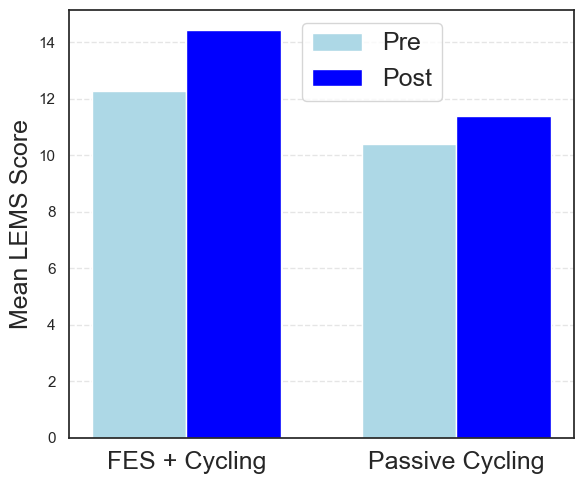

In [298]:
import numpy as np
import matplotlib.pyplot as plt

# Mean LEMS scores
pre_cFES  = np.mean([5, 8, 19, 43, 0, 6, 5])
post_cFES = np.mean([8, 11, 17, 45, 0, 14, 6])
pre_c     = np.mean([0, 39, 4, 9, 0])
post_c    = np.mean([0, 37, 6, 11, 3])

# Grouped by intervention
labels = ['FES + Cycling', 'Passive Cycling']
pre_values  = [pre_cFES, pre_c]
post_values = [post_cFES, post_c]

x = np.arange(len(labels))  # [0, 1]
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2, pre_values, width, label='Pre', color='lightblue')
ax.bar(x + width/2, post_values, width, label='Post', color='blue')

# Labels and styling
ax.set_ylabel('Mean LEMS Score', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18)
ax.legend(loc='upper center', fontsize=18, bbox_to_anchor=(0.6, 1.0), ncol=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save or show
plt.savefig('/Users/ismaila/Desktop/bar_plot_lems_grouped_by_intervention.png', dpi=300)
plt.show()


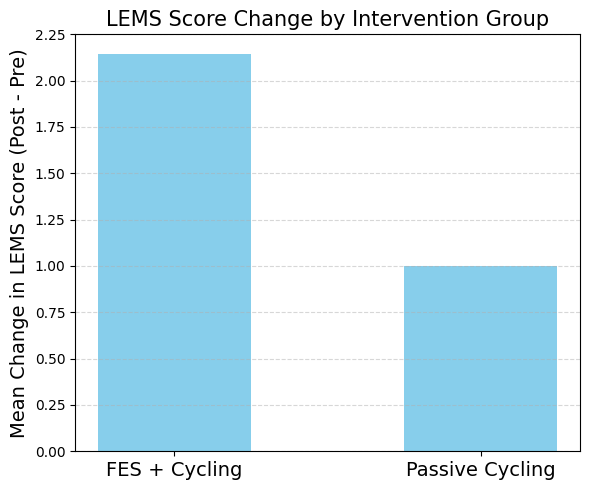

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Raw LEMS scores
fes_pre  = np.array([5, 8, 19, 43, 0, 6, 5])
fes_post = np.array([8, 11, 17, 45, 0, 14, 6])
cycling_pre  = np.array([0, 39, 4, 9, 0])
cycling_post = np.array([0, 37, 6, 11, 3])

# Change scores: Post - Pre
fes_change = fes_post - fes_pre
cycling_change = cycling_post - cycling_pre

# Mean change
change_means = [np.mean(fes_change), np.mean(cycling_change)]

# Plot setup
labels = ['FES + Cycling', 'Passive Cycling']
x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x, change_means, width, color='skyblue')

# Styling
ax.set_ylabel('Mean Change in LEMS Score (Post - Pre)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
plt.title('LEMS Score Change by Intervention Group', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save or show
plt.savefig('/Users/ismaila/Desktop/bar_plot_lems_change_scores.png', dpi=300)
plt.show()


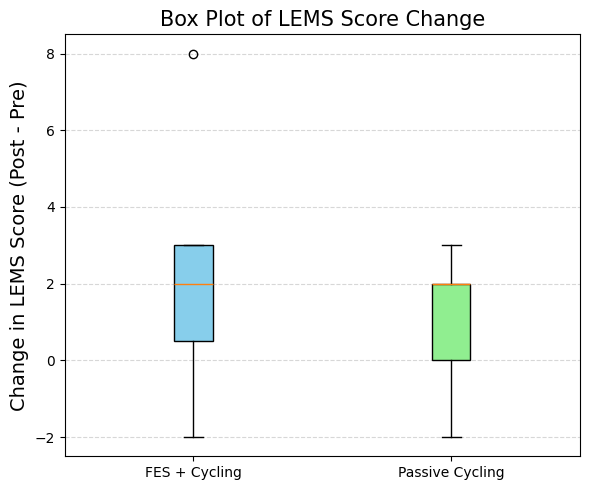

In [6]:
# Raw LEMS scores
pre_cFES  = np.array([5, 8, 19, 43, 0, 6, 5])
post_cFES = np.array([8, 11, 17, 45, 0, 14, 6])
pre_c     = np.array([0, 39, 4, 9, 0])
post_c    = np.array([0, 37, 6, 11, 3])

# Compute change (post - pre) for each subject
delta_cFES = post_cFES - pre_cFES
delta_c    = post_c - pre_c

# Data
change_data = [delta_cFES, delta_c]
labels = ['FES + Cycling', 'Passive Cycling']

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
box = ax.boxplot(change_data, patch_artist=True, labels=labels)

# Customize box color
colors = ['skyblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Styling
ax.set_ylabel('Change in LEMS Score (Post - Pre)', fontsize=14)
ax.set_title('Box Plot of LEMS Score Change', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save or show
plt.savefig('/Users/ismaila/Desktop/box_plot_lems_change.png', dpi=300)
plt.show()


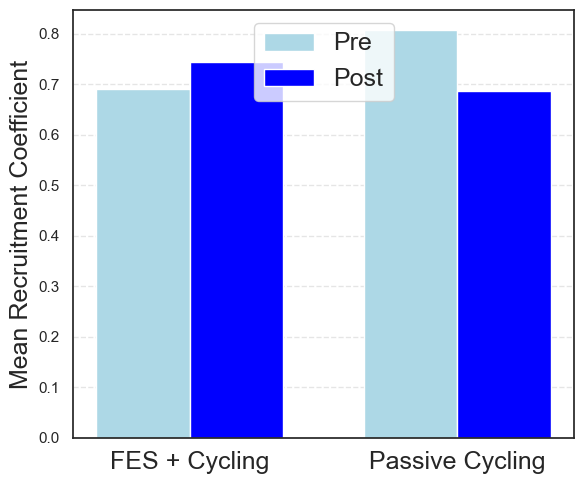

In [307]:
import numpy as np
import matplotlib.pyplot as plt

# Data arrays
Rec_pre_cfes = np.array([
    0.6576, 0.6975, 0.7059, 0.7311, 0.7311, 0.6723, 0.7143, 0.7227, 0.6744, 0.6429,
    0.5714, 0.6639, 0.7752, 0.6092, 0.7269, 0.7374, 0.7185, 0.6765, 0.687, 0.7185,
    0.7185, 0.6996, 0.6303, 0.6071, 0.7248, 0.7227, 0.7458, 0.687, 0.7269, 0.6807,
    0.7752, 0.5714, 0.563, 0.7269, 0.7374
])
Rec_post_cfes = np.array([
    0.7668, 0.7668, 0.7668, 0.7668, 0.7668, 0.7542, 0.7689, 0.7185, 0.6261, 0.771,
    0.645, 0.7227, 0.8004, 0.6576, 0.6681, 0.7647, 0.7668, 0.7668, 0.7668, 0.7668,
    0.7668, 0.7668, 0.7689, 0.687, 0.7521, 0.8067, 0.7563, 0.8067, 0.7038, 0.8004,
    0.7584, 0.687, 0.645, 0.8004, 0.7584
])

Rec_pre_c = np.array([
    0.4941, 0.6824, 0.8353, 0.7676, 0.8353, 0.8588, 0.7618, 0.8353, 0.6735, 0.8559,
    0.8559, 0.8559, 0.8559, 0.8588, 0.7647, 0.8559, 0.7676, 0.6824, 0.8353, 0.8353,
    0.7676, 0.8353, 0.8588, 0.7088, 0.7676, 0.8559, 0.8353, 0.8559, 0.8559, 0.8559,
    0.8559, 0.8559, 0.8559, 0.8588, 0.8559
])
Rec_post_c = np.array([
    0.5324, 0.6235, 0.75, 0.6588, 0.75, 0.6059, 0.65, 0.7676, 0.7029, 0.7618,
    0.6706, 0.7618, 0.7294, 0.4794, 0.7353, 0.7353, 0.6235, 0.6235, 0.7441, 0.75,
    0.6941, 0.6235, 0.5853, 0.6824, 0.5265, 0.7471, 0.7676, 0.7676, 0.7294, 0.7353,
    0.7353, 0.5529, 0.7176, 0.7676, 0.7353
])

# Compute means
pre_vals  = [np.mean(Rec_pre_cfes), np.mean(Rec_pre_c)]
post_vals = [np.mean(Rec_post_cfes), np.mean(Rec_post_c)]

# Labels and positions
labels = ['FES + Cycling', 'Passive Cycling']
x = np.arange(len(labels))  # [0, 1]
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2, pre_vals, width, label='Pre', color='lightblue')
ax.bar(x + width/2, post_vals, width, label='Post', color='blue')

# Axis and styling
ax.set_ylabel('Mean Recruitment Coefficient', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=1, fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show or save
plt.savefig('/Users/ismaila/Desktop/recruitment_coeff_grouped_plot.png', dpi=300)

plt.show()


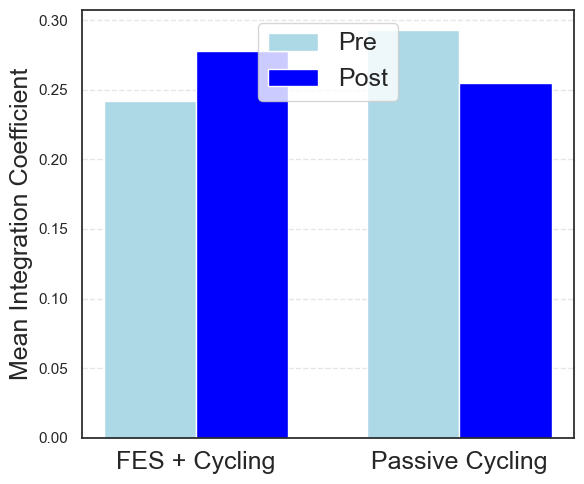

In [308]:
import numpy as np
import matplotlib.pyplot as plt

# Integration coefficient data (FES + Cycling)
Int_prefes = np.array([
    0.2861, 0.2182, 0.2554, 0.2273, 0.2273, 0.268, 0.2403, 0.242, 0.2372, 0.2359,
    0.2922, 0.2143, 0.2152, 0.2498, 0.2316, 0.219, 0.2333, 0.2468, 0.2623, 0.2333,
    0.2333, 0.2446, 0.2515, 0.2957, 0.2299, 0.2238, 0.2398, 0.229, 0.2459, 0.2294,
    0.2152, 0.255, 0.2762, 0.2316, 0.219
])
Int_post_cfes = np.array([
    0.2563, 0.2563, 0.2563, 0.2563, 0.2563, 0.261, 0.2524, 0.2736, 0.3251, 0.2723,
    0.3082, 0.2892, 0.2922, 0.3052, 0.3043, 0.274, 0.2563, 0.2563, 0.2563, 0.2563,
    0.2563, 0.2563, 0.2524, 0.2541, 0.3091, 0.2714, 0.2688, 0.2714, 0.3082, 0.2922,
    0.2948, 0.3069, 0.3238, 0.2922, 0.2948
])

# Integration coefficient data (Passive Cycling)
Int_prec = np.array([
    0.2982, 0.2697, 0.28, 0.263, 0.28, 0.2976, 0.3097, 0.28, 0.3242, 0.2994,
    0.2994, 0.2994, 0.2994, 0.2976, 0.3036, 0.2994, 0.263, 0.2697, 0.28, 0.28,
    0.263, 0.28, 0.2976, 0.3121, 0.3218, 0.2994, 0.28, 0.2994, 0.2994, 0.2994,
    0.2994, 0.2994, 0.2976, 0.2994, 0.2994
])
Int_postc = np.array([
    0.2806, 0.2618, 0.2376, 0.2564, 0.2376, 0.2479, 0.2558, 0.2297, 0.2727, 0.2412,
    0.2794, 0.2412, 0.2479, 0.2982, 0.2606, 0.2606, 0.2618, 0.2618, 0.2491, 0.2376,
    0.2224, 0.2618, 0.2418, 0.2612, 0.2485, 0.2479, 0.2539, 0.2539, 0.2479, 0.2606,
    0.2606, 0.26, 0.2685, 0.2539, 0.2606
])

# Compute means
pre_vals  = [np.mean(Int_prefes), np.mean(Int_prec)]
post_vals = [np.mean(Int_post_cfes), np.mean(Int_postc)]

# Labels and positions
labels = ['FES + Cycling', 'Passive Cycling']
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2, pre_vals, width, label='Pre', color='lightblue')
ax.bar(x + width/2, post_vals, width, label='Post', color='blue')

# Axis and styling
ax.set_ylabel('Mean Integration Coefficient', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=1, fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show or save
plt.savefig('/Users/ismaila/Desktop/integration_coeff_grouped_plot.png', dpi=300)
plt.show()


In [289]:
pre_cFES

12.285714285714286

In [15]:
# # Recruitment coefficient
# static_communities = np.zeros((200,))
# def perm_test_friedman_parallel_rec(s1, s2, nmc=1000, n_jobs=-1):
#     """
#     Parallelized permutation-based Friedman test for recruitment differences.

#     Parameters:
#     - s1: np.array (R, N1) - community labels from group 1
#     - s2: np.array (R, N2) - community labels from group 2
#     - static_communities: np.array or list defining static communities for recruitment
#     - nmc: int - number of permutations
#     - n_jobs: int - number of CPU cores to use (-1 means all available)

#     Returns:
#     - p_values: np.array (R,) or shape of recruitment matrices
#     """

#     R, N1 = s1.shape
#     N2 = s2.shape[1]
#     combined = np.concatenate((s1, s2), axis=1)
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff = np.abs(rec_s2 - rec_s1)
#     exceedances = np.zeros_like(diff)

#     def perm_step(_):
#         sp = np.random.permutation(combined.T).T
#         sp1, sp2 = sp[:, :N1], sp[:, N1:]
#         rec1 = communitymeasures.recruitment(sp1, static_communities)
#         rec2 = communitymeasures.recruitment(sp2, static_communities)
#         return (np.abs(rec2 - rec1) >= diff).astype(int)

#     results = Parallel(n_jobs=n_jobs)(
#         delayed(perm_step)(i) for i in tqdm(range(nmc), desc="Permuting (recruitment)")
#     )

#     for res in results:
#         exceedances += res

#     p_values = exceedances / nmc
#     return p_values


In [136]:
# rec_pvalue = perm_test_friedman_parallel_rec(S1_cFES_pre, S3_cFES_post, nmc=10000, n_jobs=8)
# print(f"Recruitment p-value matrix shape: {rec_pvalue.shape}")


In [17]:
# # Integration Coefficient
# def perm_test_friedman_parallel_int(s1, s2, nmc=1000, n_jobs=-1):
#     """
#     Parallel permutation-based Friedman test on integration differences between two groups.

#     Parameters:
#     - s1: np.array (R, N1): Community assignments for group 1 (e.g., pre-intervention)
#     - s2: np.array (R, N2): Community assignments for group 2 (e.g., post-intervention)
#     - static_communities: list or array of community labels used to compute integration
#     - nmc: int: Number of Monte Carlo permutations
#     - n_jobs: int: Number of CPU cores to use (-1 = all)

#     Returns:
#     - p_values: np.array with shape equal to integration output (e.g., (C, C))
#     """

#     R, N1 = s1.shape
#     N2 = s2.shape[1]
#     combined = np.concatenate((s1, s2), axis=1)

#     # Compute observed integration matrices
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     diff = np.abs(int_s2 - int_s1)
#     exceedances = np.zeros_like(diff)

#     def perm_step(_):
#         sp = np.random.permutation(combined.T).T
#         sp1, sp2 = sp[:, :N1], sp[:, N1:]
#         int1 = communitymeasures.integration(sp1, static_communities)
#         int2 = communitymeasures.integration(sp2, static_communities)
#         return (np.abs(int2 - int1) >= diff).astype(int)

#     # Parallel processing with progress bar
#     results = Parallel(n_jobs=n_jobs)(
#         delayed(perm_step)(i) for i in tqdm(range(nmc), desc="Permuting (integration)")
#     )

#     for res in results:
#         exceedances += res

#     p_values = exceedances / nmc
#     return p_values


In [137]:
# int_pvalue = perm_test_friedman_parallel_int(S1_cFES_pre, S3_cFES_post, nmc=10000, n_jobs=8) # 20,000
# print(f"Integration p-value matrix shape: {int_pvalue.shape}")

#### 9. Show scattered plot of PreFES vs PostFES recruitment and integration coefficients.  

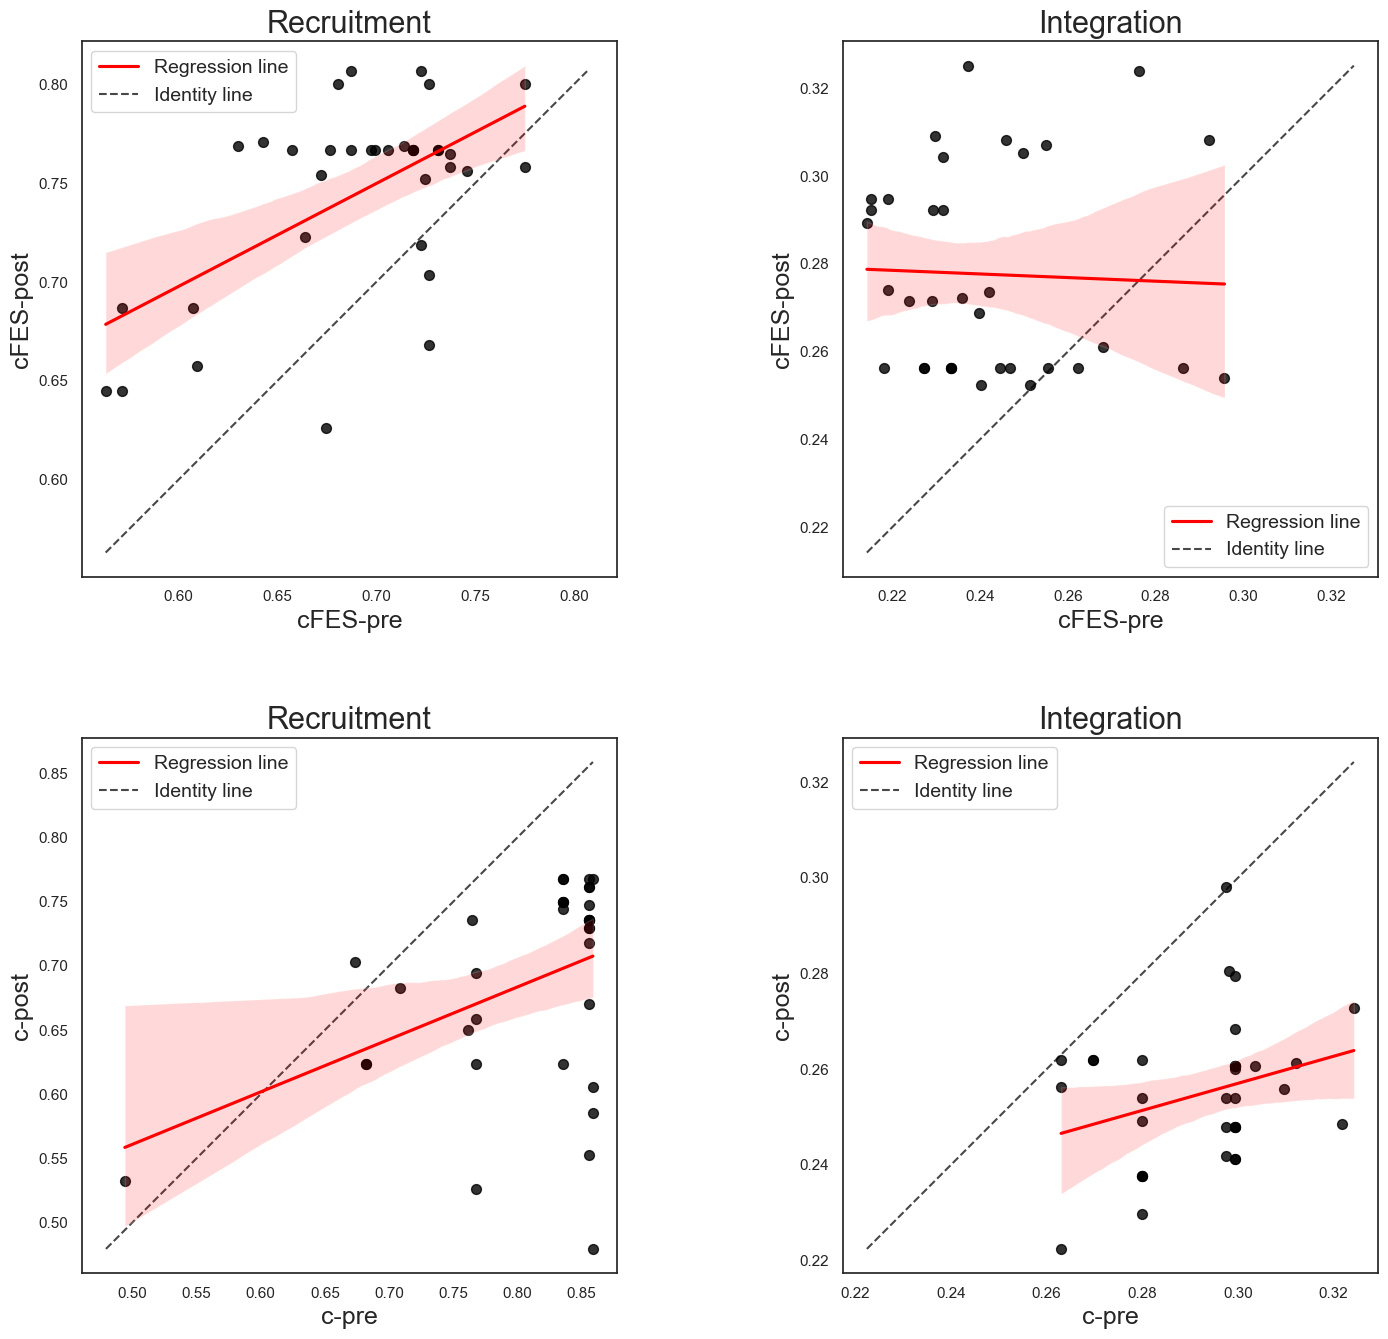

In [129]:
# Define figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 16))
(ax1, ax2), (ax3, ax4) = axes
sns.set(style='white')

# Function to plot regression with identity line
def plot_regression(ax, x, y, xlabel, ylabel, title):
    sns.regplot(x=x, y=y, ci=95, scatter_kws={"color": "black", "s": 50}, 
                line_kws={"color": "red", 'label': 'Regression line'}, ax=ax)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_title(title, fontsize=22)

    # Define identity line limits
    lims = [min(np.min(x), np.min(y)), max(np.max(x), np.max(y))]
    ax.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.axis('square')
    ax.legend(loc="best", fontsize=14)

# cFES_pre vs cFES_post Rec/Int
plot_regression(ax1, x_rec_SMN_cfes, z_rec_SMN_cfes, group_label[0], group_label[1], 'Recruitment')
perm_test(x_rec_SMN_cfes, z_rec_SMN_cfes, 20000)

plot_regression(ax2, x_int_SMN_cfes, z_int_SMN_cfes, group_label[0], group_label[1], 'Integration')
perm_test(x_int_SMN_cfes, z_int_SMN_cfes, 20000)


# c-pre vs c-Post
plot_regression(ax3, x_rec_SMN_c, z_rec_SMN_c, group_label[2], group_label[3], 'Recruitment')
perm_test(x_rec_SMN_c, z_rec_SMN_c, 20000)

plot_regression(ax4, x_int_SMN_c, z_int_SMN_c, group_label[2], group_label[3], 'Integration')
perm_test(x_int_SMN_c, z_int_SMN_c, 20000)

# Adjust layout and show the figure
# plt.tight_layout(pad=2.0)

plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace=0.2)

plt.show()

# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

# cFES_pre_int
# cFES_post_int
# group_label = ['cFES-pre', 'cFES-post', 'c-pre', 'c-post']

In [ ]:
# cFES_pre', 'cFES_post', 'c_pre', 'c_post'

### Statistical tests

In [20]:
# corr_a = corr_cFES_pre
# corr_b = corr_cFES_post

# # corr_a = corr_c_pre
# # corr_b = corr_c_post

# # corr_a = corr_cFES_pre
# # corr_b = corr_c_pre

# # SMN Region
# s1 = corr_a[14:30, 14:30]     # Shape (16, 16)
# s2 = corr_a[14:30, 115:134]   # Shape (16, 19)
# s3 = corr_a[115:134, 14:30]   # Shape (19, 16)
# s4 = corr_a[115:134, 115:134] # Shape (19, 19)

# print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

# fc_smn_matrix_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# # Print the shape of the resulting matrix
# print("FC of SMN matrix cFES_pre:", fc_smn_matrix_a.shape)

# # 
# # Slice rows and columns from 15:31 and 116:135
# s1 = corr_b[14:30, 14:30]     # Shape (16, 16)
# s2 = corr_b[14:30, 115:134]   # Shape (16, 19)
# s3 = corr_b[115:134, 14:30]   # Shape (19, 16)
# s4 = corr_b[115:134, 115:134] # Shape (19, 19)

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

# fc_smn_matrix_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# # Print the shape of the resulting matrix
# print("FC of SMN matrix c_pre:", fc_smn_matrix_b.shape)

In [92]:
# # ************* # cFES_pre', 'cFES_post', 'c_pre', 'c_post'
# # Group #1
# x_rec = cFES_pre_rec
# z_rec = cFES_post_rec
# x_in = cFES_pre_int
# z_in = cFES_post_int

# # Group #2
# # x_rec = c_pre_rec
# # z_rec = c_post_rec
# # x_in = c_pre_int
# # z_in = c_post_int

# # Group #3
# # x_rec = cFES_pre_rec
# # z_rec = c_pre_rec
# # x_in = cFES_pre_int
# # z_in = c_pre_int

# slice1 = x_rec[14:30]   
# slice2 = x_rec[115:134]  
# x_rec_SMN = np.concatenate((slice1, slice2))
# print(x_rec_SMN.shape) 

# slice1 = z_rec[14:30]   
# slice2 = z_rec[115:134]  
# z_rec_SMN = np.concatenate((slice1, slice2))
# print(z_rec_SMN.shape) 

# slice1 = x_in[14:30]   
# slice2 = x_in[115:134]  
# x_in_SMN = np.concatenate((slice1, slice2))
# print(x_in_SMN.shape) 

# slice1 = z_in[14:30]   
# slice2 = z_in[115:134]  
# z_in_SMN = np.concatenate((slice1, slice2))
# print(z_in_SMN.shape)

# # x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN

In [93]:
# # S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post

# S1_a = S1_cFES_pre
# S1_b = S3_cFES_post

# # S1_a = S2_c_pre
# # S1_b = S4_c_post

# # S1_a = S1_cFES_pre
# # S1_b = S2_c_pre

# slice1 = S1_a[14:30, :]  
# slice2 = S1_a[115:134, :] 
# S1_a_SMN = np.vstack((slice1, slice2))
# print(f'SMN cFES_pre shape: {S1_a_SMN.shape}') 

# slice1 = S1_b[14:30, :]  
# slice2 = S1_b[115:134, :] 
# S1_b_SMN = np.vstack((slice1, slice2))
# print(f'SMN cFES_post shape: {S1_b_SMN.shape}') 

In [94]:
# # SMN Perm-test cFES_pre - cFES_post
# static_communities = np.zeros((35,))
# # pvalue_int1 = perm_test_integration(S1_a_SMN, S1_b_SMN, nmc=20000) ##  
# # pvalue_rec1 = perm_test_recruitment(S1_a_SMN, S1_b_SMN, nmc=20000) ##

# pvalue_rec = perm_test_friedman_parallel_rec(S1_a_SMN, S1_b_SMN, nmc=20000, n_jobs=8)
# pvalue_int = perm_test_friedman_parallel_int(S1_a_SMN, S1_b_SMN, nmc=20000, n_jobs=8) # 20,000

In [95]:
# print(f'pvalue_rec: {pvalue_rec.shape} | pvalue_int: {pvalue_int.shape} ')

# rec_pvalue_perm
# int_pvalue_perm
# alg_pvalue_perm

#### 12. Plot brain glass visualization (significant regions of recruitment and integration coefficients)  

In [205]:
analysis = 'Pre vs Post'
diff_rec_abs1 = abs(cFES_pre_rec - cFES_post_rec)
diff_int_abs1 = abs(cFES_pre_int - cFES_post_int)

# diff_rec_abs1 = abs(c_pre_rec - c_post_rec)
# diff_int_abs1 = abs(c_pre_int - c_post_int)

# diff_rec_abs1 = abs(cFES_pre_rec - c_pre_rec)
# diff_int_abs1 = abs(cFES_pre_int - c_pre_int)


diff_rec1 = diff_rec_abs1 
diff_int1 = diff_int_abs1 
idx = 0
# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1
        
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
# Recruitment pre-post
sig_rec2 = np.where((diff_rec1 >= 0.0))[0] #(diff_rec1 >= 0.2) & (pvalue_rec1 == 0)
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f]
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2]
# color_g2 = [color[i] for i in sig_rec2]
# size_g2 = [int(diff_rec[i] * 100) for i in sig_rec2]
idx=idx+1
plot_markers(coords_g2, color_g2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)
# color_gb

# Integration pre-post
sig_int4 = np.where((diff_int1 >= 0.0) )[0] #& (pvalue_int1 == 0)
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]

idx = idx+1
plot_markers(coords_g4, color_g4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# View 1 = Rec PreFES vs PostFES
# View 2 = Int PreFES vs PostFES

View: 1
View: 2


In [218]:
# rec_pre1 = rec_pre1_r_cfes
# rec_post1 = rec_post1_r_cfes
diff_rec_abs1 = abs(cFES_pre_rec - cFES_post_rec)
diff_int_abs1 = abs(cFES_pre_int - cFES_post_int)


# diff_rec = diff_rec_abs
diff_rec1 = diff_rec_abs1
# diff_int = diff_int_abs
diff_int1 = diff_int_abs1 
idx = 0

lime = (0, 1, 1)
cyan = (0, 1, 0)


# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1

        
# color_g2b = ['purple', cyan, lime, lime, lime, lime, lime, lime, lime, lime, 'green','violet', lime,
#               lime, lime, lime, lime, lime, lime, lime, lime, lime, lime,'green','orange','orange','red']
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']

color_gb2 = rec_fnet_color1_r_cfes
        
# Recruitment 1-3
# sig_rec2 = np.where((diff_rec1 >= 0.0))[0] 
sig_rec2 = np.where((diff_rec1 < 0.05))[0]  
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f] 
idx=idx+1
size_g2 = [x + 10 for x in size_g2]
plot_markers(coords_g2, color_gb2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)

# Integration 1-3
# sig_int4 = np.where((diff_int1 >= 0.0))[0] 
sig_int4 = np.where((diff_int1 < 0.05))[0]
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]

size_g4 = [x + 10 for x in size_g4]
color_gb4 = int_fnet_color1_i_cfes

idx = idx+1
plot_markers(coords_g4, color_gb4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)


View: 1
View: 2


In [219]:

diff_rec_abs1 = abs(c_pre_rec - c_post_rec)
diff_int_abs1 = abs(c_pre_int - c_post_int)

# diff_rec = diff_rec_abs
diff_rec1 = diff_rec_abs1
# diff_int = diff_int_abs
diff_int1 = diff_int_abs1 
idx = 0

lime = (0, 1, 1)
cyan = (0, 1, 0)


# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1

        
# color_g2b = ['purple', cyan, lime, lime, lime, lime, lime, lime, lime, lime, 'green','violet', lime,
#               lime, lime, lime, lime, lime, lime, lime, lime, lime, lime,'green','orange','orange','red']
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']

color_gb2 = rec_fnet_color1_r_c
        
# Recruitment 1-3
# sig_rec2 = np.where((diff_rec1 >= 0.0))[0] 
sig_rec2 = np.where((diff_rec1 < 0.05))[0]  
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f] 
idx=idx+1
size_g2 = [x + 10 for x in size_g2]

plot_markers(coords_g2, color_gb2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)

# Integration 1-3
# sig_int4 = np.where((diff_int1 >= 0.0))[0] 
sig_int4 = np.where((diff_int1 < 0.05))[0]
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]
size_g4 = [x + 10 for x in size_g4]

color_gb4 = int_fnet_color1_i_c

idx = idx+1
plot_markers(coords_g4, color_gb4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# View # = Rec PreFES vs PreNFES
# View # = Rec PreFES vs PostFES
# View # = Int PreFES vs PreNFES
# View # = Int PreFES vs PostFES

View: 1
View: 2


In [204]:
# # rec_pre1, rec_post1, rec_fnets_plot1, rec_fnet_color1
# _r_cfes _i_cfes _r_c _i_c
# rec_pre1 = rec_pre1_r_cfes
# rec_post1 = rec_post1_r_cfes
# rec_fnets_plot1 = rec_fnets_plot1_r_cfes
# rec_fnet_color1 = rec_fnet_color1_r_cfes

In [216]:
size_g2

[27, 25, 25, 25]

In [215]:
size_g2 = [x + 10 for x in size_g2]
size_g2

[27, 25, 25, 25]

In [272]:
# pvalue_int1

In [29]:
print(f' shape :{(pvalue_int.shape)} {(pvalue_rec.shape)} {(diff_rec1.shape)} {(diff_int1.shape)} ')

 shape :(35,) (35,) (200,) (200,) 


In [30]:
# x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN

print(f' reshape: {len(x_rec_SMN)} {len(z_rec_SMN)}, {len(x_in_SMN)} {len(z_in_SMN)}')

 reshape: 35 35, 35 35


In [192]:
def compute_sign_diff_rec(x_rec_SMN, z_rec_SMN, pvalue_rec, save_path):
    """
    Compute recruitment differences, save formatted results to Excel,
    and return last four columns as separate lists.

    Parameters:
    - x_rec_SMN: np.array or list of recruitment values (pre-FES)
    - z_rec_SMN: np.array or list of recruitment values (post-FES)
    - pvalue_rec: np.array or list of p-values from permutation test
    - save_path: str, full path to save the Excel file (e.g., "output_rec_smn.xlsx")

    Returns:
    - rec_pre1: list of Rec_prefes1 values where diff is significant
    - rec_post1: list of Rec_postfes1 values where diff is significant
    - fnets_plot1: list of Fnets_plot1 where diff is significant
    - fnet_color1: list of Fnet_color1 where diff is significant
    """

    fnets_plot = [
        "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2",
        "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1",
        "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2",
        "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1"
    ]
    fnet_color = [
        "lime", "lime", "lime", "lime", "lime", "lime", "lime",
        "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan",
        "lime", "lime", "lime", "lime", "lime", "lime", "lime",
        "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan"
    ]

    df = pd.DataFrame({
        'Fnets_plot': fnets_plot,
        'Fnet_color': fnet_color,
        'Rec_prefes': x_rec_SMN,
        'Rec_postfes': z_rec_SMN,
        'Pvalue_rec': pvalue_rec
    })

    # Compute difference
    df['diff'] = np.abs(df['Rec_prefes'] - df['Rec_postfes'])

    # Keep diff if significant (e.g. < 0.05)
    df['sign_diff'] = df['diff'].apply(lambda x: x if x < 0.05 else 0)

    # Filter values where diff is significant
    df['Rec_pre1'] = df.apply(lambda row: row['Rec_prefes'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Rec_post1'] = df.apply(lambda row: row['Rec_postfes'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Fnets_plot1'] = df.apply(lambda row: row['Fnets_plot'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Fnet_color1'] = df.apply(lambda row: row['Fnet_color'] if row['sign_diff'] != 0 else np.nan, axis=1)

    # Round everything
    df = df.round(4)

    # Save to Excel
    df.to_excel(save_path, index=False)
    print(f" Saved results to: {save_path}")

    # Drop NaNs from each column and return as lists
    rec_pre1 = df['Rec_pre1'].dropna().tolist()
    rec_post1 = df['Rec_post1'].dropna().tolist()
    fnets_plot1 = df['Fnets_plot1'].dropna().tolist()
    fnet_color1 = df['Fnet_color1'].dropna().tolist()
    
    return rec_pre1, rec_post1, fnets_plot1, fnet_color1


In [193]:
save_path_r_cfes = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_rec_smn_cfes.xlsx"
rec_pre1_r_cfes, rec_post1_r_cfes, rec_fnets_plot1_r_cfes, rec_fnet_color1_r_cfes = compute_sign_diff_rec(x_rec_SMN_cfes, z_rec_SMN_cfes, rec_pvalue_cfes, save_path_r_cfes)

save_path_i_cfes = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_int_smn_cfes.xlsx"
int_pre1_i_cfes, int_post1_i_cfes, int_fnets_plot1_i_cfes, int_fnet_color1_i_cfes = compute_sign_diff_rec(x_int_SMN_cfes, z_int_SMN_cfes, int_pvalue_cfes, save_path_i_cfes)

 Saved results to: /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_rec_smn_cfes.xlsx
 Saved results to: /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_int_smn_cfes.xlsx


In [194]:
save_path_r_c = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_rec_smn_c.xlsx"
rec_pre1_r_c, rec_post1_r_c, rec_fnets_plot1_r_c, rec_fnet_color1_r_c = compute_sign_diff_rec(x_rec_SMN_c, z_rec_SMN_c, rec_pvalue_c, save_path_r_c)

save_path_i_c = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_int_smn_c.xlsx"
int_pre1_i_c, int_post1_i_c, int_fnets_plot1_i_c, int_fnet_color1_i_c = compute_sign_diff_rec(x_int_SMN_c, z_int_SMN_c, int_pvalue_c, save_path_i_c)

 Saved results to: /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_rec_smn_c.xlsx
 Saved results to: /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_int_smn_c.xlsx


In [198]:
# cl_pre_SMN_cfes, cl_post_SMN_cfes
# cl_pre_SMN_c, cl_post_SMN_c

# x_alg_SMN_cfes, z_alg_SMN_cfes
# x_alg_SMN_c, z_alg_SMN_c

# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

# rec_pvalue_cfes
# int_pvalue_cfes
# rec_pvalue_c
# int_pvalue_c
# alg_pvalue_cfes
# alg_pvalue_c
# len(rec_pre1_r_cfes)
# len(int_pre1_i_cfes)

22

In [163]:
from matplotlib.ticker import FormatStrFormatter

color_rgb = {
    "purple": (128/255, 0, 128/255),
    "blue": (0, 0, 255/255),
    "green": (0, 128/255, 0),
    "violet": (238/255, 130/255, 238/255),
    "moccasin": (255/255, 228/255, 181/255),
    "orange": (255/255, 165/255, 0),
    "red": (255/255, 0, 0),
    "lime": (0, 1, 0),
    "cyan": (0, 1, 1)
}

r_fnc1 = rec_fnet_color1
i_fnc1 = int_fnet_color1

r_fnc1 = [color_rgb[color] for color in r_fnc1]
i_fnc1 = [color_rgb[color] for color in i_fnc1]

scatter_kws_rec1 = {"color": r_fnc1, "s": 200}

scatter_kws_int1 = {"color": i_fnc1, "s": 200}

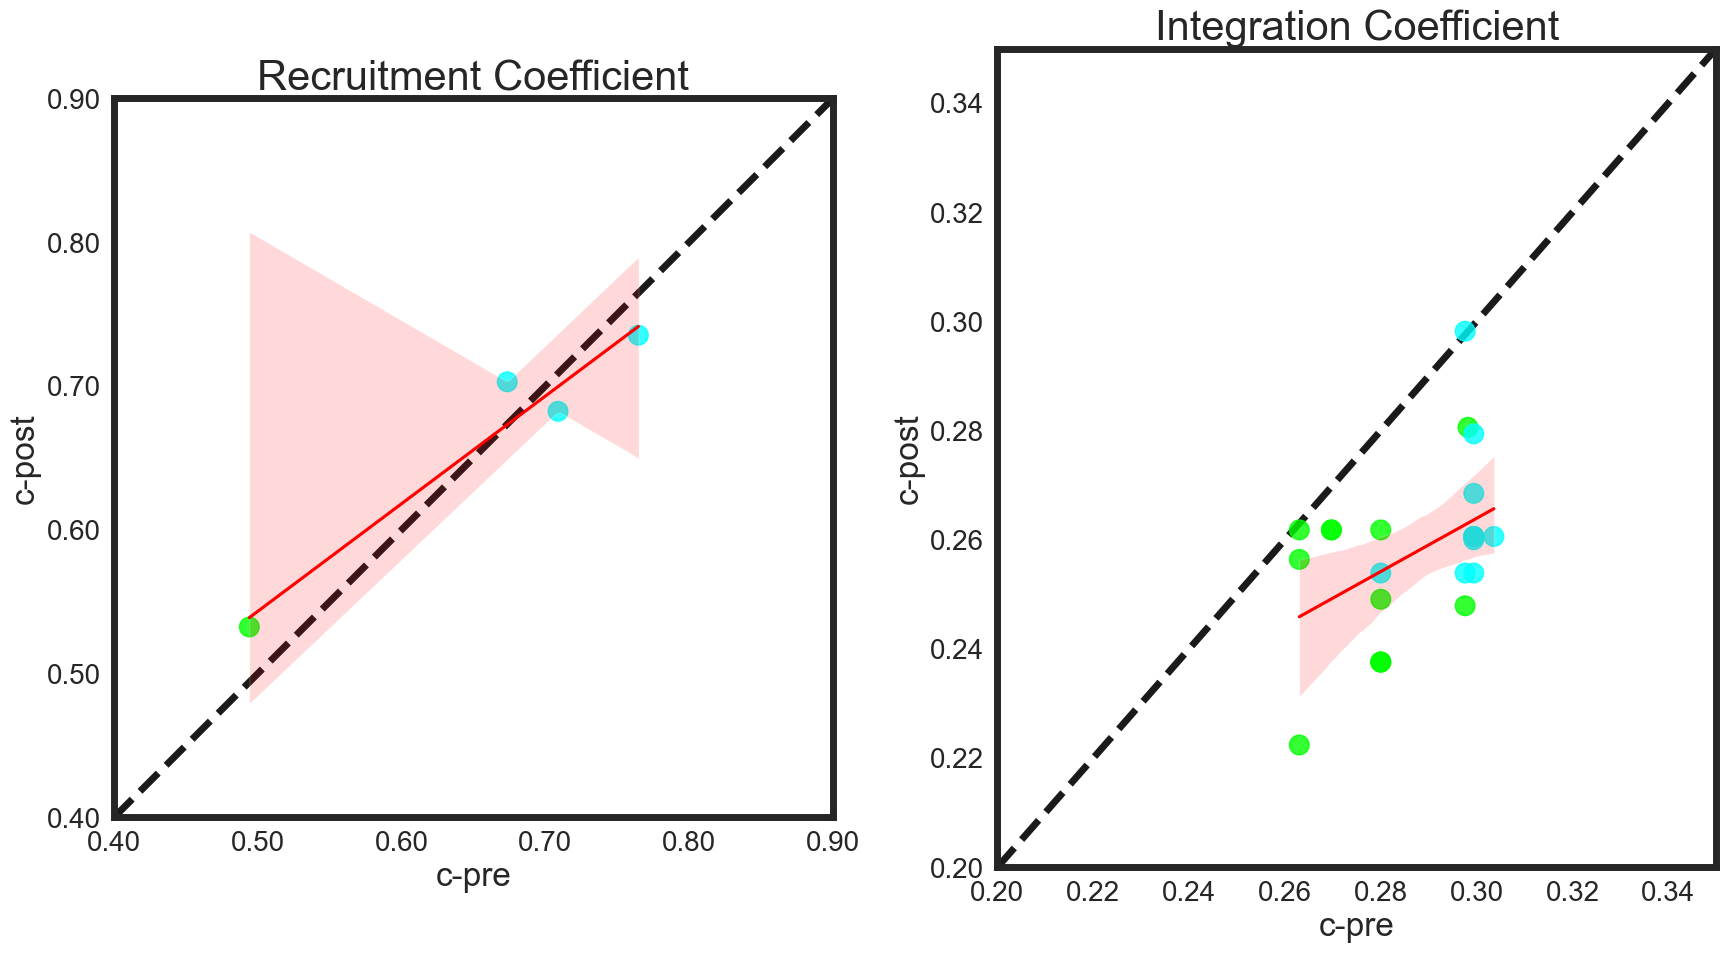

In [165]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
sns.set(style='white')

# rec_pre1, rec_post1, rec_fnets_plot1, rec_fnet_color1
# _r_cfes _i_cfes _r_c _i_c
rec_pre1 = rec_pre1_r_cfes
rec_post1 = rec_post1_r_cfes
rec_fnets_plot1 = rec_fnets_plot1_r_cfes
rec_fnet_color1 = rec_fnet_color1_r_cfes

# Recruitment 1-3
sns.regplot(x=rec_pre1, y=rec_post1, ci=95, scatter_kws=scatter_kws_rec1, 
            line_kws={"color": "red", 'label': 'Regression line'}, ax=ax1)
ax1.set_xlabel(group_label[2], fontsize=24)
ax1.set_ylabel(group_label[3], fontsize=24)
ax1.set_title('Recruitment Coefficient', fontsize=30)

# Ensure min/max and intervals are the same for both axes
lims = [0.4, 0.90]
ax1.set_xlim(lims)
ax1.set_ylim(lims)
ax1.set_aspect('equal', adjustable='box')
ax1.plot(lims, lims, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.tick_params(axis='both', labelsize=20)

# Integration 
sns.regplot(x=int_pre1, y=int_post1, ci=95, scatter_kws=scatter_kws_int1, 
            line_kws={"color": "red", 'label': 'Regression line'}, ax=ax2)
ax2.set_xlabel(group_label[2], fontsize=24)
ax2.set_ylabel(group_label[3], fontsize=24)
ax2.set_title('Integration Coefficient', fontsize=30)

lims1 = [0.20, 0.35]
ax2.set_xlim(lims1)
ax2.set_ylim(lims1)
ax2.plot(lims1, lims1, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.tick_params(axis='both', labelsize=20)

# Customize spines
for ax in [ax1, ax2]:
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_linewidth(5)

plt.grid(False)
plt.rcParams["axes.grid"] = False
plt.tight_layout(pad=2.0)
plt.show()

In [36]:
# S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
S1_a = S1_cFES_pre
S1_b = S3_cFES_post

# S1_a = S2_c_pre
# S1_b = S4_c_post

# S1_a = S1_cFES_pre
# S1_b = S2_c_pre

#### 15.  Plot allegiance matrix all regions 200x200

In [223]:
# S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
alg_a = x_alg_SMN_cfes
alg_b = z_alg_SMN_cfes
alg_c = alg_pvalue_cfes

# alg_a = x_alg_SMN_c
# alg_b = z_alg_SMN_c
# alg_c = alg_pvalue_c

# x_alg_SMN_c, z_alg_SMN_c
# x_alg_SMN_cfes, z_alg_SMN_cfes

# alg_cFES_pre
# alg_cFES_post
# alg_pvalue_perm

# alg_a = alg_c_pre
# alg_b = alg_c_post
# alg_c = alg_pvalue

# alg_a = alg_S1_cFES
# alg_b = alg_cFES_post
# alg_c = alg_pvalue


alg_a = np.nan_to_num(alg_a, nan=0)
alg_b = np.nan_to_num(alg_b, nan=0)
alg_c = np.nan_to_num(alg_c, nan=0)

In [168]:
# # Allegiance matrix 200x200 
# cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap

# # np.set_printoptions(precision=2)
# fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# # Plot the first matrix
# # plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
# im1 = axs[0].matshow(alg_a, vmin=0, vmax=1, cmap=cmap)
# axs[0].set_title(f'cFES-pre\nmean:{np.mean(alg_a):.4f} std:{np.std(alg_a):.4f}', fontsize=26, y=1.04)

# # Plot the second matrix
# im2 = axs[1].matshow(alg_b, vmin=0, vmax=1, cmap=cmap)
# axs[1].set_title(f'cFES-post\nmean:{np.mean(alg_b):.4f} std:{np.std(alg_b):.4f}', fontsize=26, y=1.04)

# # Plot the third matrix
# im3 = axs[2].matshow(alg_c, vmin=0, vmax=1, cmap=cmap)
# axs[2].set_title(f'Pvalue (pre vs post)', fontsize=26, y=1.04)

# # Adjust ticks and gridlines for all subplots
# for ax in axs:
#     ax.tick_params(
#         axis='both',       # changes apply to the x,y-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labeltop=False,    # labels along the top edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add rectangle objects as tick labels (X axis)
# xmin, xmax, ymin, ymax = axs[0].axis()
# h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

# axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# # Add rectangle objects as tick labels (Y axis)
# w = (ymax-ymin)/30; i = ymax # intercept
# axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # # Add a single colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
# cbar.ax.tick_params(labelsize=18)

# plt.show()

In [169]:
alg_diff = np.abs(alg_b - alg_a)
diff_thresh = threshold_matrix(alg_diff)

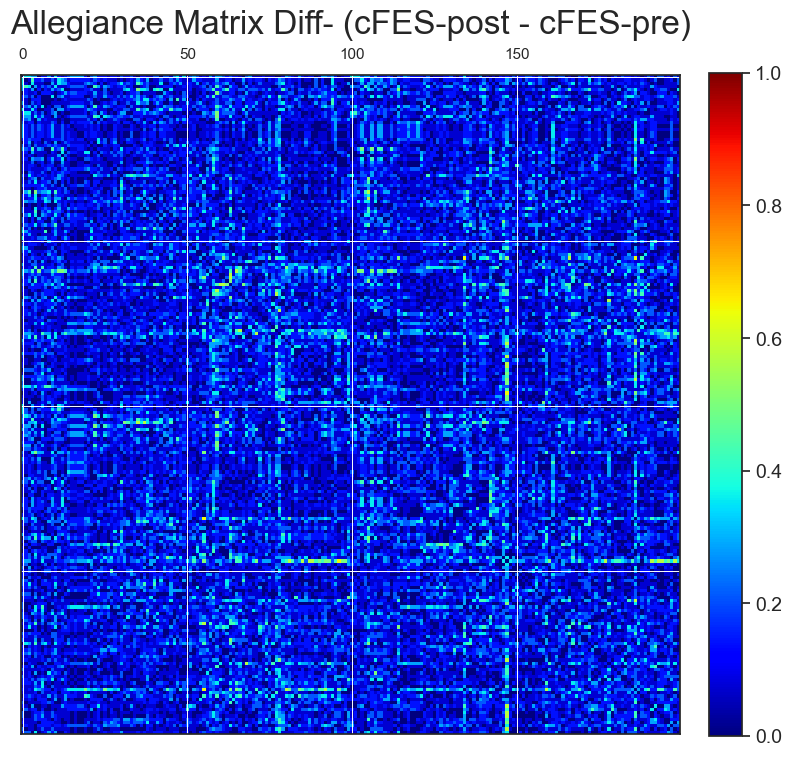

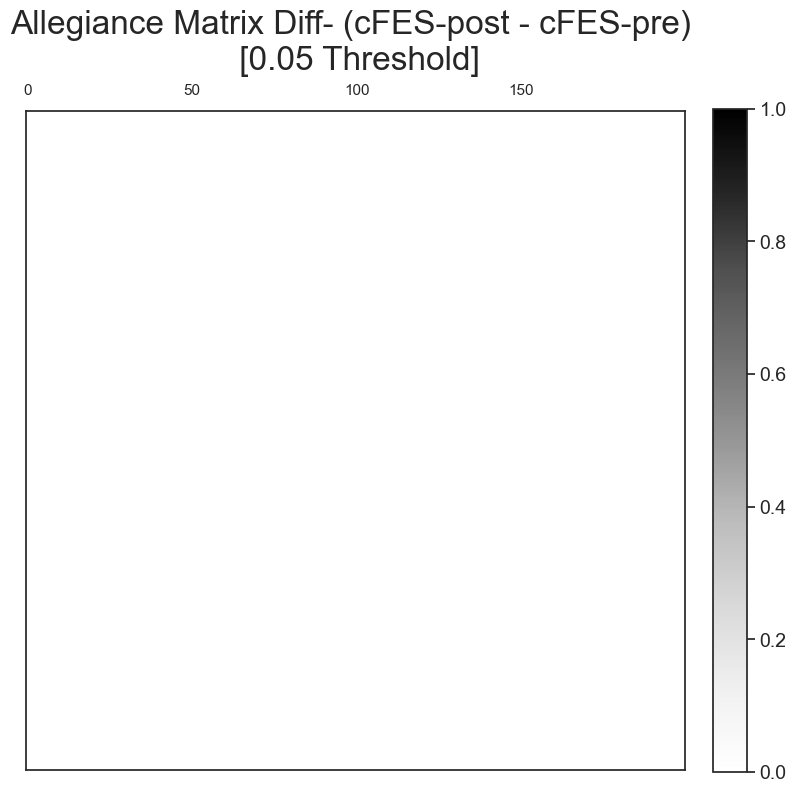

In [170]:

# Define color map
cmap = 'jet'  # Other options: 'rainbow', 'twilight', etc.

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the allegiance matrix
im = ax.matshow(alg_diff, vmin=0, vmax=1, cmap=cmap)
mean_val = np.mean(alg_diff)
std_val = np.std(alg_diff)
ax.set_title(f'Allegiance Matrix Diff- (cFES-post - cFES-pre)',fontsize=24, y=1.05)

# Customize axis
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)
ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()
 
#######Thresholded    
# Define color map
cmap = 'Greys'  # Other options: 'rainbow', 'twilight', etc.

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the allegiance matrix
im = ax.matshow(diff_thresh, vmin=0, vmax=1, cmap=cmap)
mean_val = np.mean(diff_thresh)
std_val = np.std(diff_thresh)
ax.set_title(f'Allegiance Matrix Diff- (cFES-post - cFES-pre) \n [0.05 Threshold]',fontsize=24, y=1.05)

# Customize axis
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)
ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()


In [171]:
def threshold_matrices(allegiance_matx):

    # Unpack matrices
    A, B, C = allegiance_matx

    # Detect matrix size
    if A.shape != B.shape or A.shape != C.shape:
        raise ValueError("All matrices must have the same dimensions.")
    
    # Threshold matrix C
    C_thresh = np.where(C <= 0.05, 1, 0)

    # Use C_thresh to threshold A and B
    A_thresh = A * C_thresh
    B_thresh = B * C_thresh

    # Display results
    print(f'Shape of thresholded matrices: {A_thresh.shape}, {B_thresh.shape}, {C_thresh.shape}')
    
    return A_thresh, B_thresh, C_thresh


# Call function
A_thresh, B_thresh, C_thresh = threshold_matrices([alg_a, alg_b, alg_c])


ValueError: All matrices must have the same dimensions.

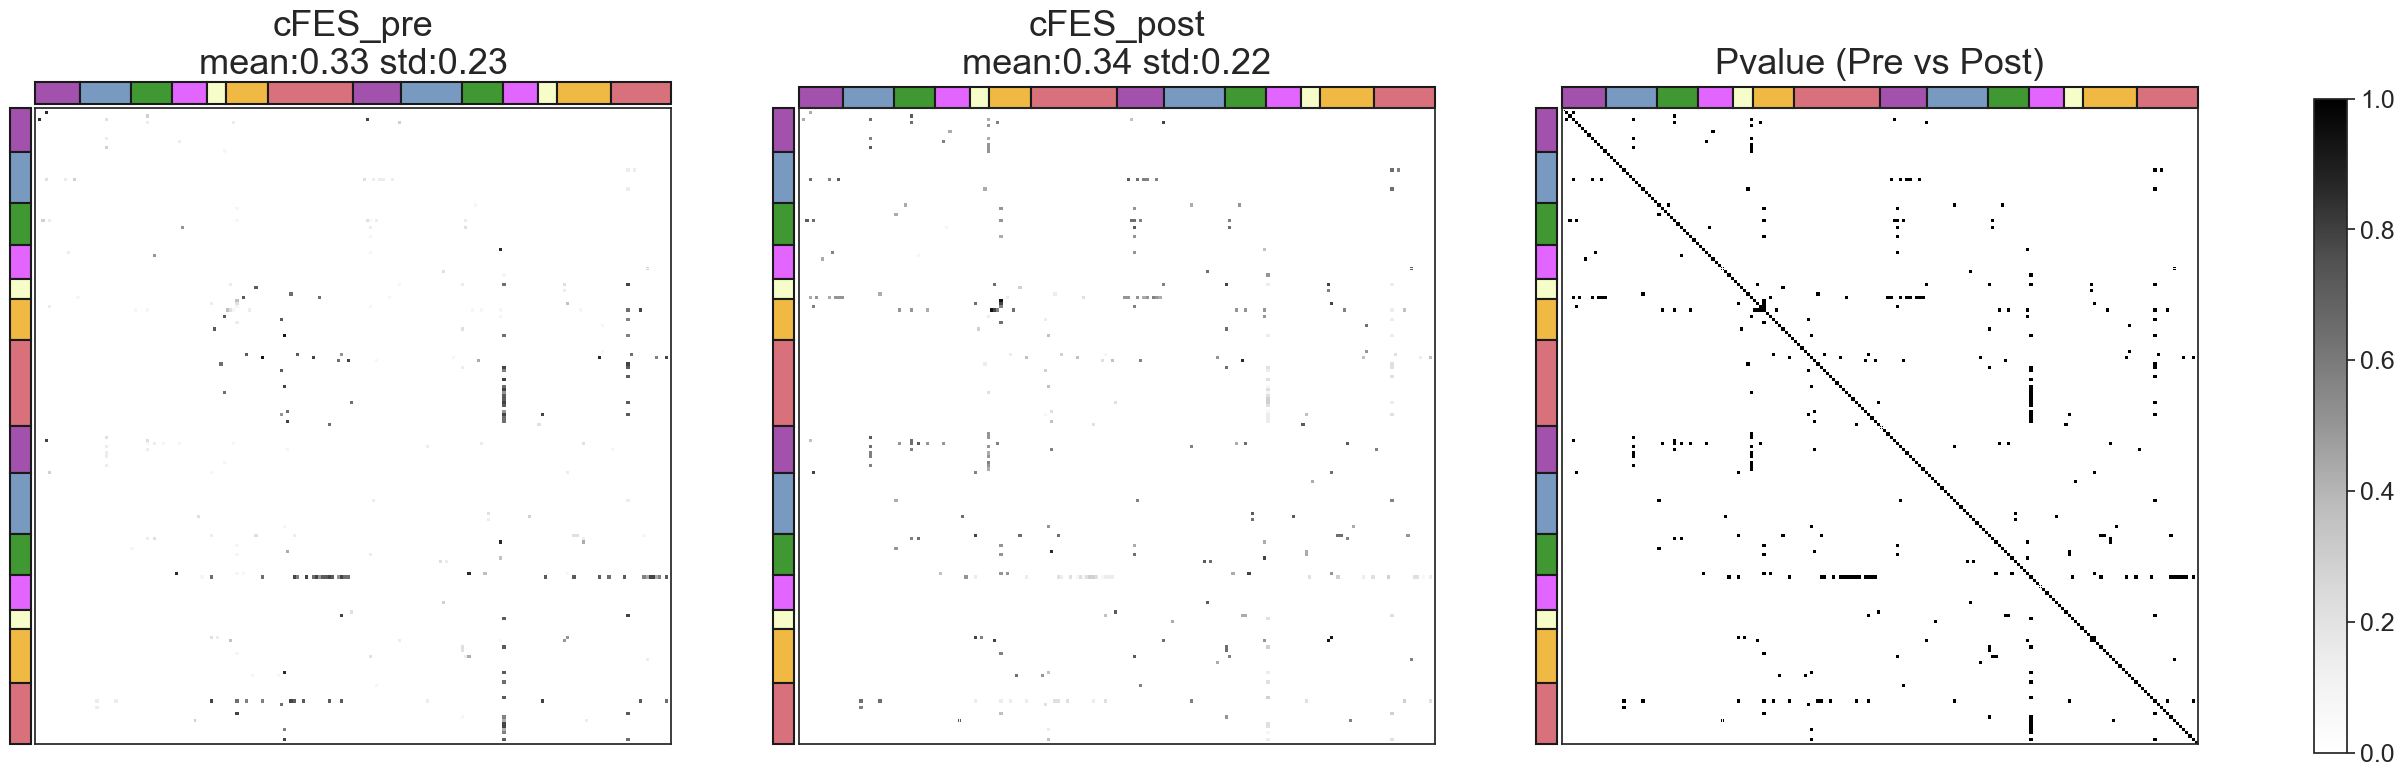

In [40]:
cmap = 'Greys' # Greys jet
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix
# plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
im1 = axs[0].matshow(A_thresh, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES_pre\nmean:{np.mean(alg_a):.2f} std:{np.std(alg_a):.2f}', fontsize=26, y=1.04)


# Plot the second matrix
im2 = axs[1].matshow(B_thresh, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'cFES_post\nmean:{np.mean(alg_b):.2f} std:{np.std(alg_b):.2f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(C_thresh, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue (Pre vs Post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

#### 16. Plot allegiance matrix for SMN region only  

In [41]:
# ## S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
# # Slice rows and columns from 15:31 and 116:135
 
# # alg_a = alg_cFES_pre
# # alg_b = alg_cFES_post
# # alg_c = alg_pvalue

# s1 = alg_a[14:30, 14:30]     # Shape (16, 16)
# s2 = alg_a[14:30, 115:134]   # Shape (16, 19)
# s3 = alg_a[115:134, 14:30]   # Shape (19, 16)
# s4 = alg_a[115:134, 115:134] # Shape (19, 19)

# print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
# alg_smn_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# s1 = alg_b[14:30, 14:30]     # Shape (16, 16)
# s2 = alg_b[14:30, 115:134]   # Shape (16, 19)
# s3 = alg_b[115:134, 14:30]   # Shape (19, 16)
# s4 = alg_b[115:134, 115:134] # Shape (19, 19)

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
# alg_smn_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# s1 = alg_c[14:30, 14:30]     # Shape (16, 16)a
# s2 = alg_c[14:30, 115:134]   # Shape (16, 19)
# s3 = alg_c[115:134, 14:30]   # Shape (19, 16)
# s4 = alg_c[115:134, 115:134] # Shape (19, 19)

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
# pvalue_smn_alg_c = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# print(f'Allegiance SMN PreFES:{alg_smn_a.shape} {alg_smn_b.shape} {pvalue_smn_alg_c.shape}')

Shape pvalue: (16, 16) (16, 19) (19, 16) (19, 19)
Allegiance SMN PreFES:(35, 35) (35, 35) (35, 35)


In [226]:
# alg_a = x_alg_SMN_cfes
# alg_b = z_alg_SMN_cfes
# alg_c = alg_pvalue_cfes

# alg_a = x_alg_SMN_c
# alg_b = z_alg_SMN_c
# alg_c = alg_pvalue_c


# alg_smn_a = x_alg_SMN_cfes
# alg_smn_b = z_alg_SMN_cfes
# pvalue_smn_alg_c = alg_pvalue_cfes


alg_smn_a = x_alg_SMN_c
alg_smn_b = z_alg_SMN_c
pvalue_smn_alg_c = alg_pvalue_c


alg_smn_a = np.nan_to_num(alg_smn_a, nan=0)
alg_smn_b = np.nan_to_num(alg_smn_b, nan=0)
# alg_c = np.nan_to_num(alg_c, nan=0)
# x_alg_SMN_cfes, z_alg_SMN_cfes

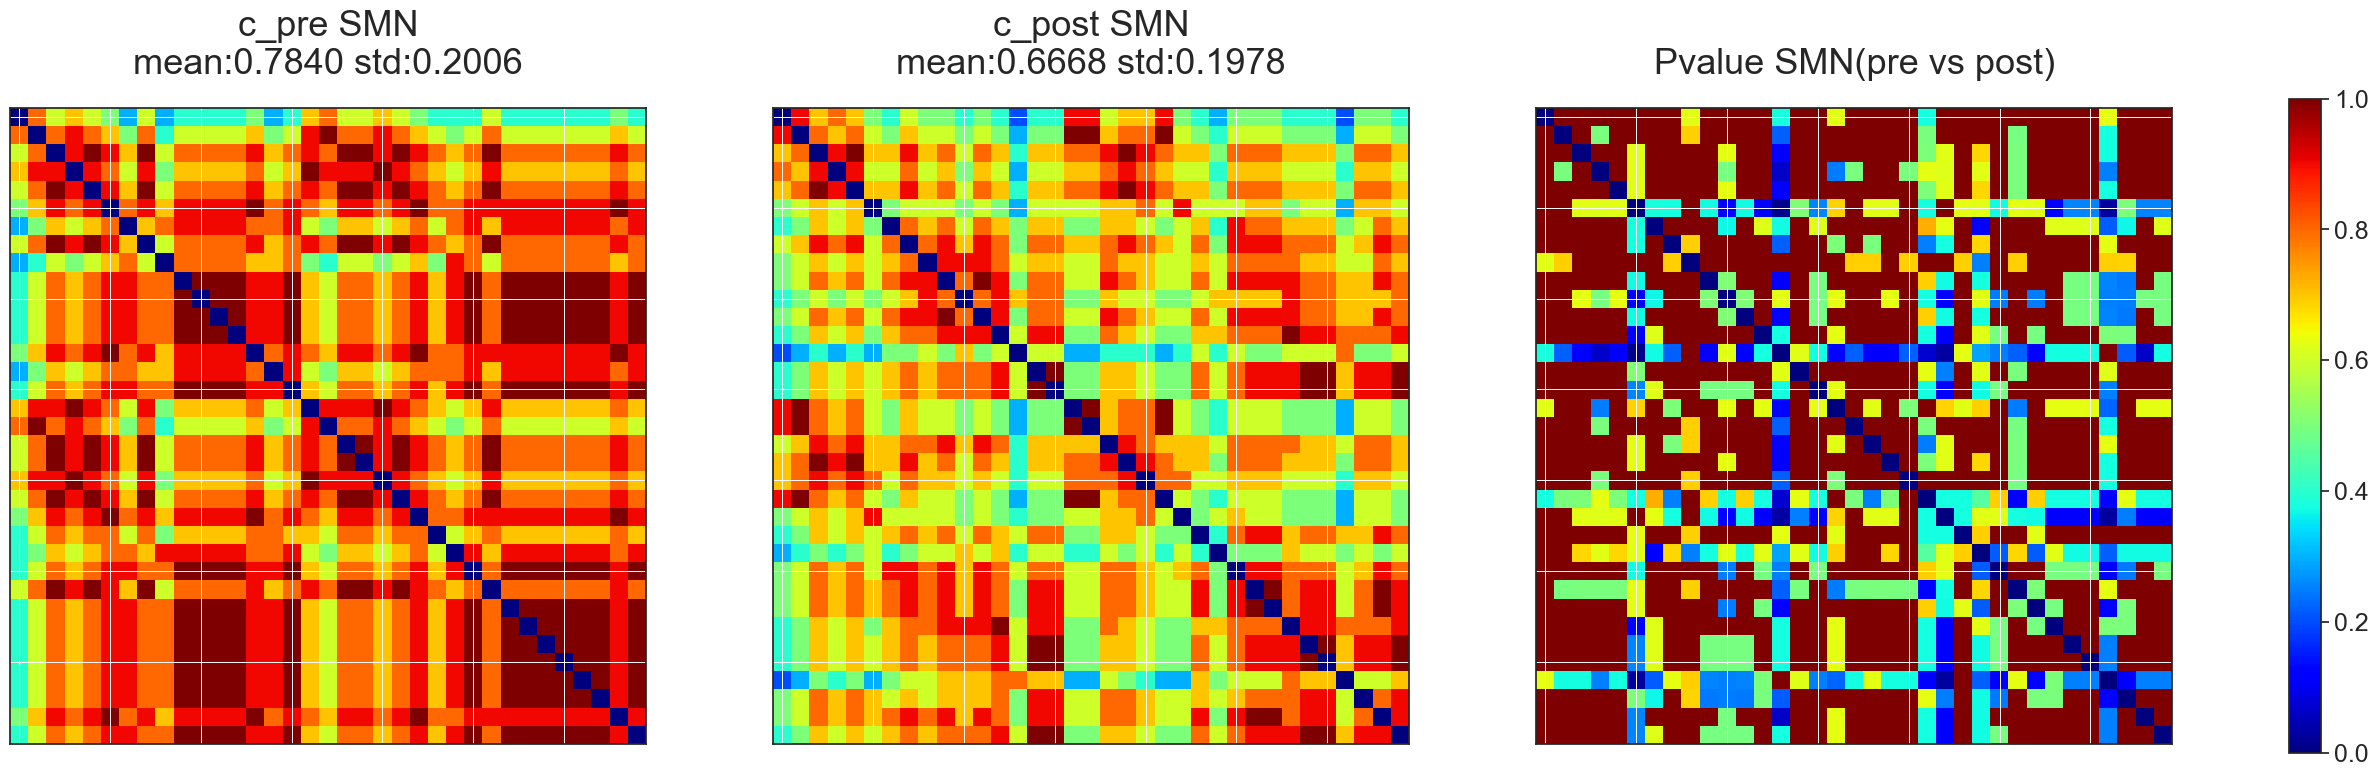

In [228]:
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# 
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix 
im1 = axs[0].matshow(alg_smn_a, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'c_pre SMN\nmean:{np.mean(alg_smn_a):.4f} std:{np.std(alg_smn_a):.4f}', fontsize=26, y=1.04)


# Plot the second matrix
im2 = axs[1].matshow(alg_smn_b, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'c_post SMN\nmean:{np.mean(alg_smn_b):.4f} std:{np.std(alg_smn_b):.4f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(pvalue_smn_alg_c, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue SMN(pre vs post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

#### Allegiance Difference (Post-Pre) 

In [173]:
alg_diff_smn = np.abs(alg_smn_b - alg_smn_a)
print(f'Allegiance Diff: {alg_diff_smn.shape}')
df_alg_diff = pd.DataFrame(alg_diff_smn)
file_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/alg_diff.xlsx"
df_alg_diff.to_excel(file_path, index=False)

Allegiance Diff: (35, 35)


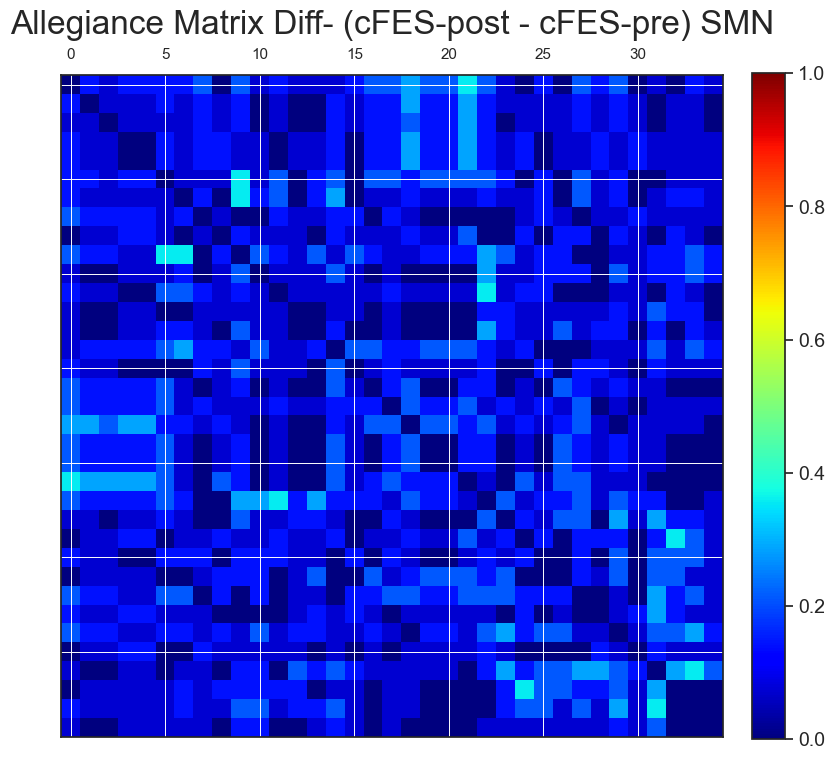

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# Define color map
cmap = 'jet'  # Other options: 'rainbow', 'twilight', etc.

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the allegiance matrix
im = ax.matshow(alg_diff_smn, vmin=0, vmax=1, cmap=cmap)
mean_val = np.mean(alg_diff_smn)
std_val = np.std(alg_diff_smn)
ax.set_title(f'Allegiance Matrix Diff- (cFES-post - cFES-pre) SMN',fontsize=24, y=1.05)

# Customize axis
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)
ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()


In [175]:
def threshold_matrix(input_matrix, threshold=0.05):
    return np.where(input_matrix < threshold, input_matrix, 0)
diff_thresh_smn = threshold_matrix(alg_diff_smn)

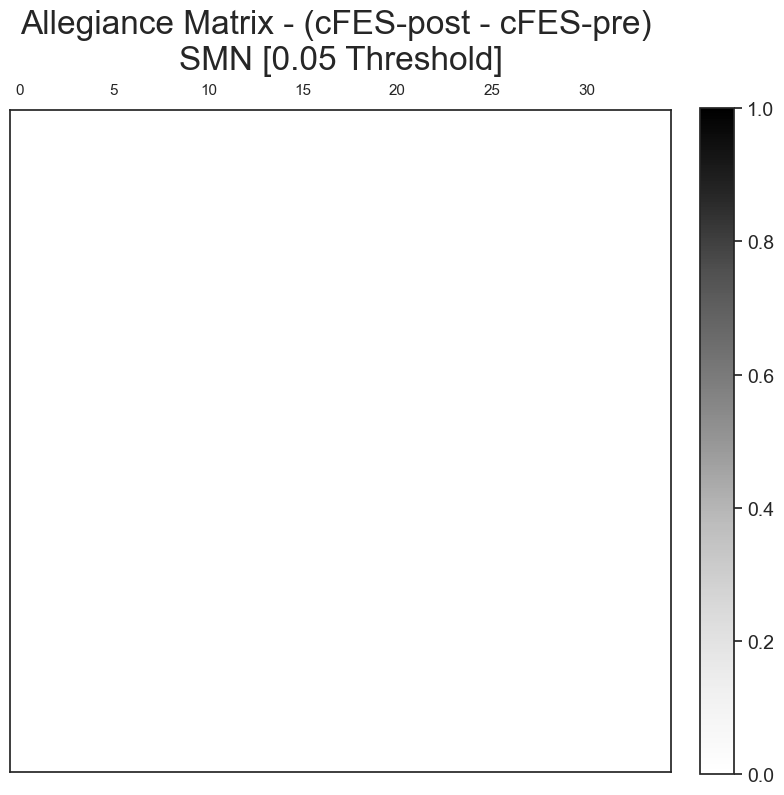

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Define color map
cmap = 'Greys'  # Other options: 'rainbow', 'twilight', etc.

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the allegiance matrix
im = ax.matshow(diff_thresh_smn, vmin=0, vmax=1, cmap=cmap)
mean_val = np.mean(diff_thresh_smn)
std_val = np.std(diff_thresh_smn)
ax.set_title(f'Allegiance Matrix - (cFES-post - cFES-pre) \nSMN [0.05 Threshold]',fontsize=24, y=1.05)

# Customize axis
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)
ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()


In [120]:
A_thresh_smn, B_thresh_smn, C_thresh_smn = threshold_matrices([alg_smn_a, alg_smn_b, pvalue_smn_alg_c])

Shape of thresholded matrices: (35, 35), (35, 35), (35, 35)


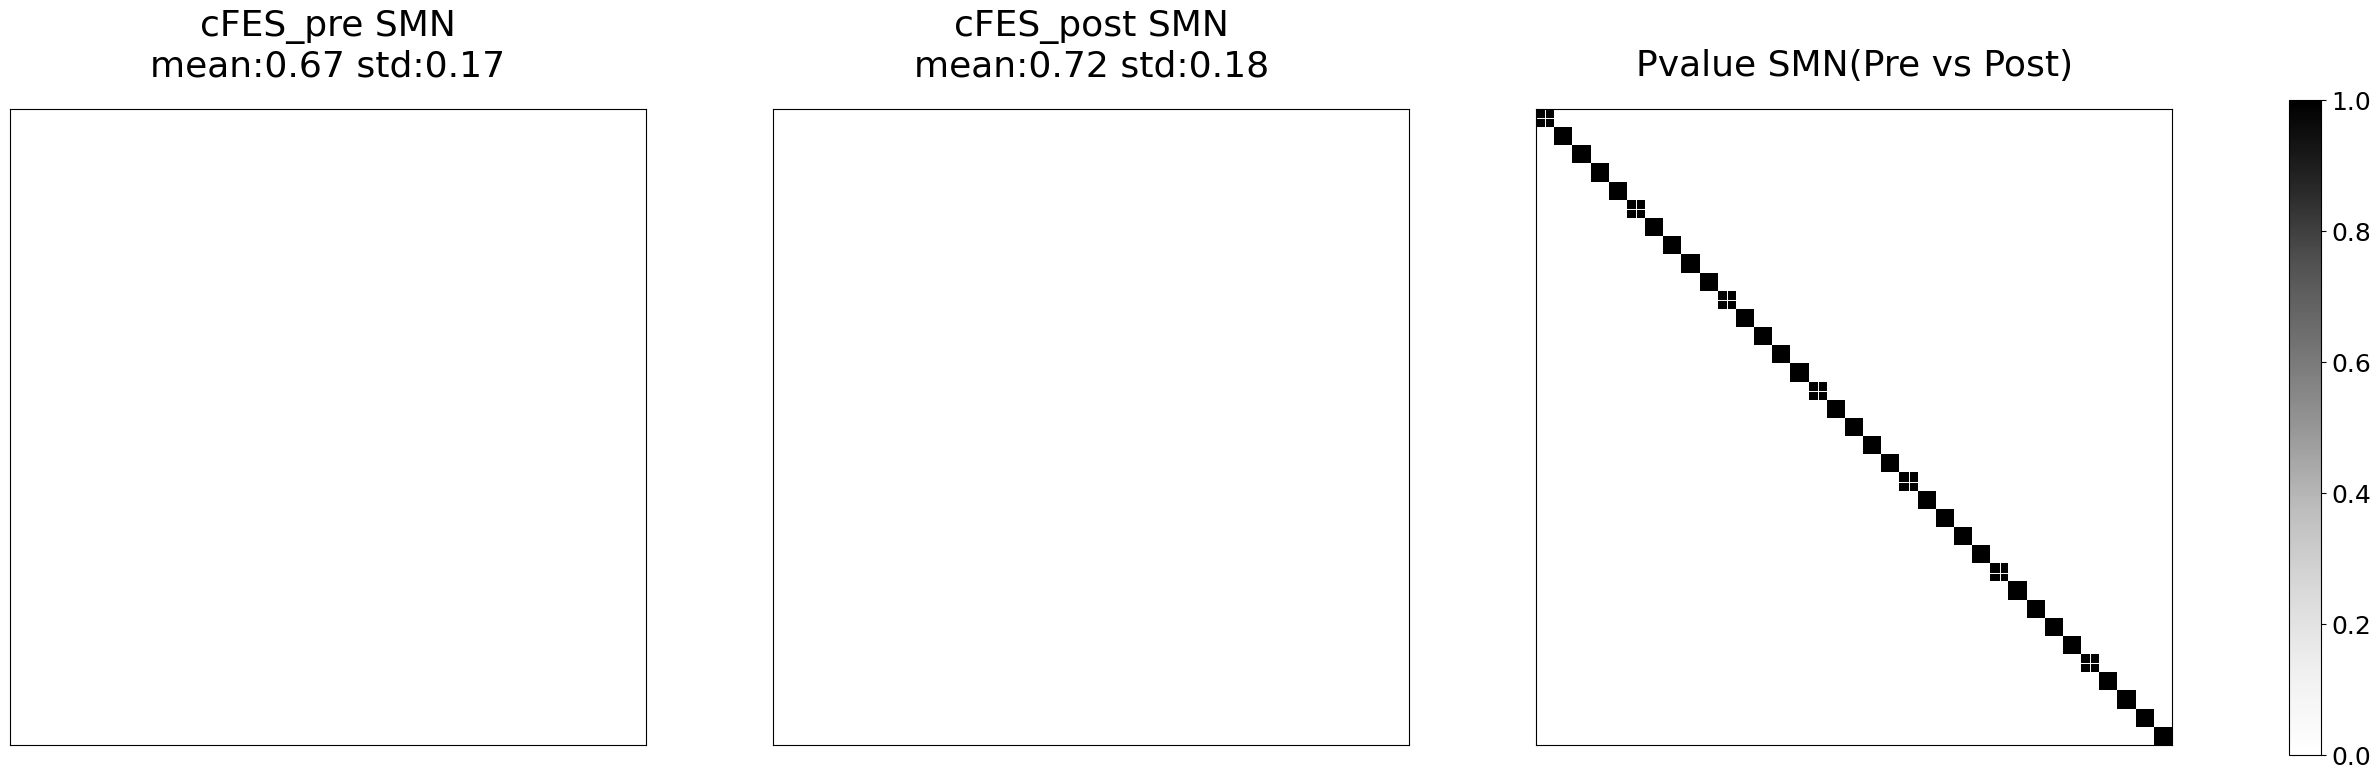

In [121]:
cmap = 'Greys'  # Greys, jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# 
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix 
im1 = axs[0].matshow(A_thresh_smn, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES_pre SMN\nmean:{np.mean(alg_smn_a):.2f} std:{np.std(alg_smn_a):.2f}', fontsize=26, y=1.04)

# Plot the second matrix
im2 = axs[1].matshow(B_thresh_smn, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'cFES_post SMN\nmean:{np.mean(alg_smn_b):.2f} std:{np.std(alg_smn_b):.2f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(C_thresh_smn, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue SMN(Pre vs Post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [52]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 12:41:43.520172


In [46]:
# import pkg_resources

# installed_packages = pkg_resources.working_set
# for package in installed_packages:
#     print(f"{package.key}=={package.version}")